### Table des matières

* [1. Découverte des données](#chapter1)
* [2. Analyse des données](#chapter2)
    * [2.1 Vue d'ensemble](#section_2_1)
    * [2.2 Analyse du fichier EdStatsCountry](#section_2_2)
    * [2.3 Analyse du fichier EdStatsCountry-Series](#section_2_3)
    * [2.4 Analyse du fichier EdStatsData](#section_2_4)
    * [2.5 Analyse du fichier EdStatsFootNote](#section_2_5)
    * [2.6 Analyse du fichier EdStatsSeries](#section_2_6)
* [3. Réduction du dataset](#chapter3)
    * [3.1 Créations des 2 data-frames de travail](#section_3_1)
    * [3.2 Réduction via la variable Income Group](#section_3_2)
    * [3.3 Réduction via la population 15/24 ans](#section_3_3)
    * [3.4 Réduction via le taux de remplissage par année](#section_3_4)
    * [3.5 Réduction via le taux de remplissage des indicateurs](#section_3_5)
    * [3.6 Selection des indicateurs pertinents](#section_3_6)
    * [3.7 Traitement des valeurs manquantes](#section_3_7)
    * [3.8 Scaling](#section_3_8)
* [4. Analyse et score](#chapter4)
    * [4.1 Analyse des indicateurs en fonction des groupes](#section_4_1)
    * [4.2 Score des pays](#section_4_2)
    * [4.3 Prévision du score futur](#section_4_3)   

Initialisation du Notebook

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import matplotlib.patches as mpatches
import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set_theme(style='whitegrid')
pd.set_option('display.max_column',71)
pd.set_option('display.max_row',300)

# 1. Découverte des données <a class="anchor" id="chapter1"></a>

Ouverture et découverte des différents fichiers

In [3]:
Df_country=pd.read_csv("EdStatsCountry.csv")
Df_country_Series=pd.read_csv("EdStatsCountry-Series.csv")
Df_Data=pd.read_csv("EdStatsData.csv")
Df_Foot= pd.read_csv("EdStatsFootNote.csv")
Df_Series=pd.read_csv("EdStatsSeries.csv")

In [4]:
print(Df_country.shape)
print(Df_country.dtypes)
print(Df_country.isnull().sum())
Df_country.head(3)

(241, 32)
Country Code                                          object
Short Name                                            object
Table Name                                            object
Long Name                                             object
2-alpha code                                          object
Currency Unit                                         object
Special Notes                                         object
Region                                                object
Income Group                                          object
WB-2 code                                             object
National accounts base year                           object
National accounts reference year                     float64
SNA price valuation                                   object
Lending category                                      object
Other groups                                          object
System of National Accounts                           object
Alternative co

Country Code   Short Name   Table Name                     Long Name  \
0          ABW        Aruba        Aruba                         Aruba   
1          AFG  Afghanistan  Afghanistan  Islamic State of Afghanistan   
2          AGO       Angola       Angola   People's Republic of Angola   

  2-alpha code   Currency Unit  \
0           AW   Aruban florin   
1           AF  Afghan afghani   
2           AO  Angolan kwanza   

                                       Special Notes  \
0  SNA data for 2000-2011 are updated from offici...   
1  Fiscal year end: March 20; reporting period fo...   
2  April 2013 database update: Based on IMF data,...   

                      Region          Income Group WB-2 code  \
0  Latin America & Caribbean  High income: nonOECD        AW   
1                 South Asia            Low income        AF   
2         Sub-Saharan Africa   Upper middle income        AO   

  National accounts base year  National accounts reference year  \
0                        2000                               NaN   
1                     2002/03                               NaN   
2                        2002                               NaN   

                    SNA price valuation Lending category Other groups  \
0     Value added at basic prices (VAB)              NaN          NaN   
1     Value added at basic prices (VAB)              IDA         HIPC   
2  Value added at producer prices (VAP)             IBRD          NaN   

                         System of National Accounts  \
0  Country uses the 1993 System of National Accou...   
1  Country uses the 1993 System of National Accou...   
2  Country uses the 1993 System of National Accou...   

  Alternative conversion factor PPP survey year  \
0                           NaN             NaN   
1                           NaN             NaN   
2                       1991–96            2005   

              Balance of Payments Manual in use  \
0  IMF Balance of Payments Manual, 6th edition.   
1                                           NaN   
2  IMF Balance of Payments Manual, 6th edition.   

  External debt Reporting status       System of trade  \
0                            NaN  Special trade system   
1                         Actual  General trade system   
2                         Actual  Special trade system   

     Government Accounting concept           IMF data dissemination standard  \
0                              NaN                                       NaN   
1  Consolidated central government  General Data Dissemination System (GDDS)   
2     Budgetary central government  General Data Dissemination System (GDDS)   

  Latest population census                            Latest household survey  \
0                     2010                                                NaN   
1                     1979  Multiple Indicator Cluster Survey (MICS), 2010/11   
2                     1970               Malaria Indicator Survey (MIS), 2011   

  Source of most recent Income and expenditure data  \
0                                               NaN   
1           Integrated household survey (IHS), 2008   
2           Integrated household survey (IHS), 2008   

  Vital registration complete Latest agricultural census  \
0                         Yes                        NaN   
1                         NaN                    2013/14   
2                         NaN                       2015   

   Latest industrial data  Latest trade data Latest water withdrawal data  \
0                     NaN             2012.0                          NaN   
1                     NaN             2012.0                         2000   
2                     NaN                NaN                         2005   

   Unnamed: 31  
0          NaN  
1          NaN  
2          NaN

In [5]:
print(Df_country_Series.shape)
print(Df_country_Series.dtypes)
print(Df_country_Series.isnull().sum())
Df_country_Series.head(3)

(613, 4)
CountryCode     object
SeriesCode      object
DESCRIPTION     object
Unnamed: 3     float64
dtype: object
CountryCode      0
SeriesCode       0
DESCRIPTION      0
Unnamed: 3     613
dtype: int64


CountryCode   SeriesCode                                        DESCRIPTION  \
0         ABW  SP.POP.TOTL  Data sources : United Nations World Population...   
1         ABW  SP.POP.GROW  Data sources: United Nations World Population ...   
2         AFG  SP.POP.GROW  Data sources: United Nations World Population ...   

   Unnamed: 3  
0         NaN  
1         NaN  
2         NaN

In [6]:
print(Df_Data.shape)
print(Df_Data.dtypes)
print(Df_Data.isnull().sum())
Df_Data.head(3)


(886930, 70)
Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1970              float64
1971              float64
1972              float64
1973              float64
1974              float64
1975              float64
1976              float64
1977              float64
1978              float64
1979              float64
1980              float64
1981              float64
1982              float64
1983              float64
1984              float64
1985              float64
1986              float64
1987              float64
1988              float64
1989              float64
1990              float64
1991              float64
1992              float64
1993              float64
1994              float64
1995              float64
1996              float64
1997              float64
1998              float64
1999              float64
2000              float64
2001              float64
2002              float64
2003              float64

Country Name Country Code  \
0   Arab World          ARB   
1   Arab World          ARB   
2   Arab World          ARB   

                                      Indicator Name  Indicator Code  1970  \
0  Adjusted net enrolment rate, lower secondary, ...      UIS.NERA.2   NaN   
1  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.F   NaN   
2  Adjusted net enrolment rate, lower secondary, ...  UIS.NERA.2.GPI   NaN   

   1971  1972  1973  1974  1975  1976  1977  1978  1979  1980  1981  1982  \
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   1983  1984  1985  1986  1987  1988  1989  1990  1991  1992  1993  1994  \
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   1995  1996  1997  1998  1999  2000  2001  2002  2003  2004  2005  2006  \
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   2007  2008  2009  2010  2011  2012  2013  2014  2015  2016  2017  2020  \
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   2025  2030  2035  2040  2045  2050  2055  2060  2065  2070  2075  2080  \
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   2085  2090  2095  2100  Unnamed: 69  
0   NaN   NaN   NaN   NaN          NaN  
1   NaN   NaN   NaN   NaN          NaN  
2   NaN   NaN   NaN   NaN          NaN

In [7]:
print(Df_Foot.shape)
print(Df_Foot.dtypes)
print(Df_Foot.isnull().sum())
Df_Foot.head(3)

(643638, 5)
CountryCode     object
SeriesCode      object
Year            object
DESCRIPTION     object
Unnamed: 4     float64
dtype: object
CountryCode         0
SeriesCode          0
Year                0
DESCRIPTION         0
Unnamed: 4     643638
dtype: int64


CountryCode      SeriesCode    Year          DESCRIPTION  Unnamed: 4
0         ABW  SE.PRE.ENRL.FE  YR2001  Country estimation.         NaN
1         ABW  SE.TER.TCHR.FE  YR2005  Country estimation.         NaN
2         ABW  SE.PRE.TCHR.FE  YR2000  Country estimation.         NaN

In [8]:
print(Df_Series.shape)
print(Df_Series.dtypes)
print(Df_Series.isnull().sum())
Df_Series.head(3)

(3665, 21)
Series Code                             object
Topic                                   object
Indicator Name                          object
Short definition                        object
Long definition                         object
Unit of measure                        float64
Periodicity                             object
Base Period                             object
Other notes                             object
Aggregation method                      object
Limitations and exceptions              object
Notes from original source             float64
General comments                        object
Source                                  object
Statistical concept and methodology     object
Development relevance                   object
Related source links                    object
Other web links                        float64
Related indicators                     float64
License Type                           float64
Unnamed: 20                            float64
dt

Series Code       Topic  \
0  BAR.NOED.1519.FE.ZS  Attainment   
1     BAR.NOED.1519.ZS  Attainment   
2  BAR.NOED.15UP.FE.ZS  Attainment   

                                      Indicator Name  \
0  Barro-Lee: Percentage of female population age...   
1  Barro-Lee: Percentage of population age 15-19 ...   
2  Barro-Lee: Percentage of female population age...   

                                    Short definition  \
0  Percentage of female population age 15-19 with...   
1  Percentage of population age 15-19 with no edu...   
2  Percentage of female population age 15+ with n...   

                                     Long definition  Unit of measure  \
0  Percentage of female population age 15-19 with...              NaN   
1  Percentage of population age 15-19 with no edu...              NaN   
2  Percentage of female population age 15+ with n...              NaN   

  Periodicity Base Period Other notes Aggregation method  \
0         NaN         NaN         NaN                NaN   
1         NaN         NaN         NaN                NaN   
2         NaN         NaN         NaN                NaN   

  Limitations and exceptions  Notes from original source General comments  \
0                        NaN                         NaN              NaN   
1                        NaN                         NaN              NaN   
2                        NaN                         NaN              NaN   

                                              Source  \
0  Robert J. Barro and Jong-Wha Lee: http://www.b...   
1  Robert J. Barro and Jong-Wha Lee: http://www.b...   
2  Robert J. Barro and Jong-Wha Lee: http://www.b...   

  Statistical concept and methodology Development relevance  \
0                                 NaN                   NaN   
1                                 NaN                   NaN   
2                                 NaN                   NaN   

  Related source links  Other web links  Related indicators  License Type  \
0                  NaN              NaN                 NaN           NaN   
1                  NaN              NaN                 NaN           NaN   
2                  NaN              NaN                 NaN           NaN   

   Unnamed: 20  
0          NaN  
1          NaN  
2          NaN

# 2. Analyse des données <a class="anchor" id="chapter2"></a>

## 2.1 Vue d'ensemble  <a class="anchor" id="section_2_1"></a>

In [9]:
Description_data = pd.DataFrame(
    columns = ["Nb lignes","Nb colonnes","Nb doublons","Taux Remplissage"], 
    index= ["EdStatsCountry.csv","EdStatsCountry-Series.csv","EdStatsData.csv","EdStatsFootNote.csv","EdStatsSeries.csv"])

In [10]:
Description_data["Nb lignes"]=[len(Df_country),len(Df_country_Series),len(Df_Data),len(Df_Foot),len(Df_Series)]

In [11]:
Description_data["Nb colonnes"]=[
 len(Df_country.columns),
 len(Df_country_Series.columns),
 len(Df_Data.columns),
 len(Df_Foot.columns),
 len(Df_Series.columns)]

In [12]:
Description_data["Nb doublons"]=[
 Df_country.duplicated(subset=["Country Code"]).sum(),
 Df_country_Series.duplicated(subset=["CountryCode","SeriesCode"]).sum(),
 Df_Data.duplicated(subset=["Country Code","Indicator Name"]).sum(),
 Df_Foot.duplicated(subset=["CountryCode","SeriesCode","Year"]).sum(),
 Df_Series.duplicated(subset=["Series Code"]).sum()]

In [13]:
Description_data["Taux Remplissage"]=[
    "{:.2%}".format(Df_country.notna().sum().sum()/(Df_country.shape[0]*Df_country.shape[1])),
    "{:.2%}".format(Df_country_Series.notna().sum().sum()/(Df_country_Series.shape[0]*Df_country_Series.shape[1])),
    "{:.2%}".format(Df_Data.notna().sum().sum()/(Df_Data.shape[0]*Df_country.shape[1])),
    "{:.2%}".format(Df_Foot.notna().sum().sum()/(Df_Foot.shape[0]*Df_country.shape[1])),
    "{:.2%}".format(Df_Series.notna().sum().sum()/(Df_Series.shape[0]*Df_country.shape[1]))
]

In [14]:
#Affichons le data-frame
Description_data

Nb lignes  Nb colonnes  Nb doublons  \
EdStatsCountry.csv               241           32            0   
EdStatsCountry-Series.csv        613            4            0   
EdStatsData.csv               886930           70            0   
EdStatsFootNote.csv           643638            5            0   
EdStatsSeries.csv               3665           21            0   

                          Taux Remplissage  
EdStatsCountry.csv                  69.48%  
EdStatsCountry-Series.csv           75.00%  
EdStatsData.csv                     30.41%  
EdStatsFootNote.csv                 12.50%  
EdStatsSeries.csv                   18.56%

Aucun doublon n'est présent dans les différents fichiers, on remarque de grandes différences en termes de nbr de données et de taux de remplissage, une analyse + détaillé de chaque fichier s'impose.

## 2.2 Analyse du fichier EdStatsCountry <a class="anchor" id="section_2_2"></a>

In [15]:
#Aperçu du ficheir
Df_country.head(3)


Country Code   Short Name   Table Name                     Long Name  \
0          ABW        Aruba        Aruba                         Aruba   
1          AFG  Afghanistan  Afghanistan  Islamic State of Afghanistan   
2          AGO       Angola       Angola   People's Republic of Angola   

  2-alpha code   Currency Unit  \
0           AW   Aruban florin   
1           AF  Afghan afghani   
2           AO  Angolan kwanza   

                                       Special Notes  \
0  SNA data for 2000-2011 are updated from offici...   
1  Fiscal year end: March 20; reporting period fo...   
2  April 2013 database update: Based on IMF data,...   

                      Region          Income Group WB-2 code  \
0  Latin America & Caribbean  High income: nonOECD        AW   
1                 South Asia            Low income        AF   
2         Sub-Saharan Africa   Upper middle income        AO   

  National accounts base year  National accounts reference year  \
0                        2000                               NaN   
1                     2002/03                               NaN   
2                        2002                               NaN   

                    SNA price valuation Lending category Other groups  \
0     Value added at basic prices (VAB)              NaN          NaN   
1     Value added at basic prices (VAB)              IDA         HIPC   
2  Value added at producer prices (VAP)             IBRD          NaN   

                         System of National Accounts  \
0  Country uses the 1993 System of National Accou...   
1  Country uses the 1993 System of National Accou...   
2  Country uses the 1993 System of National Accou...   

  Alternative conversion factor PPP survey year  \
0                           NaN             NaN   
1                           NaN             NaN   
2                       1991–96            2005   

              Balance of Payments Manual in use  \
0  IMF Balance of Payments Manual, 6th edition.   
1                                           NaN   
2  IMF Balance of Payments Manual, 6th edition.   

  External debt Reporting status       System of trade  \
0                            NaN  Special trade system   
1                         Actual  General trade system   
2                         Actual  Special trade system   

     Government Accounting concept           IMF data dissemination standard  \
0                              NaN                                       NaN   
1  Consolidated central government  General Data Dissemination System (GDDS)   
2     Budgetary central government  General Data Dissemination System (GDDS)   

  Latest population census                            Latest household survey  \
0                     2010                                                NaN   
1                     1979  Multiple Indicator Cluster Survey (MICS), 2010/11   
2                     1970               Malaria Indicator Survey (MIS), 2011   

  Source of most recent Income and expenditure data  \
0                                               NaN   
1           Integrated household survey (IHS), 2008   
2           Integrated household survey (IHS), 2008   

  Vital registration complete Latest agricultural census  \
0                         Yes                        NaN   
1                         NaN                    2013/14   
2                         NaN                       2015   

   Latest industrial data  Latest trade data Latest water withdrawal data  \
0                     NaN             2012.0                          NaN   
1                     NaN             2012.0                         2000   
2                     NaN                NaN                         2005   

   Unnamed: 31  
0          NaN  
1          NaN  
2          NaN

In [16]:
print(Df_country.dtypes)

Country Code                                          object
Short Name                                            object
Table Name                                            object
Long Name                                             object
2-alpha code                                          object
Currency Unit                                         object
Special Notes                                         object
Region                                                object
Income Group                                          object
WB-2 code                                             object
National accounts base year                           object
National accounts reference year                     float64
SNA price valuation                                   object
Lending category                                      object
Other groups                                          object
System of National Accounts                           object
Alternative conversion f

In [17]:
#Résumé des variables quantitatives
Df_country.describe()

National accounts reference year  Latest industrial data  \
count                          32.00000              107.000000   
mean                         2001.53125             2008.102804   
std                             5.24856                2.616834   
min                          1987.00000             2000.000000   
25%                          1996.75000             2007.500000   
50%                          2002.00000             2009.000000   
75%                          2005.00000             2010.000000   
max                          2012.00000             2010.000000   

       Latest trade data  Unnamed: 31  
count         185.000000          0.0  
mean         2010.994595          NaN  
std             2.569675          NaN  
min          1995.000000          NaN  
25%          2011.000000          NaN  
50%          2012.000000          NaN  
75%          2012.000000          NaN  
max          2012.000000          NaN

In [18]:
#Résumé des variables qualitatives
Df_country.describe(include=[object])

Country Code Short Name Table Name Long Name 2-alpha code  \
count           241        241        241       241          238   
unique          241        241        241       241          238   
top             ABW      Aruba      Aruba     Aruba           AW   
freq              1          1          1         1            1   

       Currency Unit                                      Special Notes  \
count            215                                                145   
unique           152                                                131   
top             Euro  April 2012 database update: Based on official ...   
freq              23                                                  6   

                       Region         Income Group WB-2 code  \
count                     214                  214       240   
unique                      7                    5       240   
top     Europe & Central Asia  Upper middle income        AW   
freq                       57                   55         1   

       National accounts base year                SNA price valuation  \
count                          205                                197   
unique                          43                                  2   
top                           2005  Value added at basic prices (VAB)   
freq                            34                                163   

       Lending category Other groups  \
count               144           58   
unique                3            2   
top                IBRD         HIPC   
freq                 67           40   

                              System of National Accounts  \
count                                                 215   
unique                                                  3   
top     Country uses the 1993 System of National Accou...   
freq                                                  165   

       Alternative conversion factor PPP survey year  \
count                             47             145   
unique                            32               3   
top                          1990–95            2005   
freq                               8              98   

                   Balance of Payments Manual in use  \
count                                            181   
unique                                             1   
top     IMF Balance of Payments Manual, 6th edition.   
freq                                             181   

       External debt Reporting status       System of trade  \
count                             124                   200   
unique                              3                     2   
top                            Actual  General trade system   
freq                              107                   106   

          Government Accounting concept  \
count                               161   
unique                                2   
top     Consolidated central government   
freq                                 95   

                 IMF data dissemination standard Latest population census  \
count                                        181                      213   
unique                                         2                       27   
top     General Data Dissemination System (GDDS)                     2011   
freq                                         110                       59   

                Latest household survey  \
count                               141   
unique                               60   
top     World Health Survey (WHS), 2003   
freq                                 10   

       Source of most recent Income and expenditure data  \
count                                                160   
unique                                                75   
top              Integrated household survey (IHS), 2012   
freq                                                  15   

       Vital registration complete Latest agricultural census  \
count                          111

- La colonne Unnamed: 31 ne contient aucune donnée
- Les 4 (voir 5 si on considère la colonne 2-alpha code) premières colonnes contiennent la même information exprimée de manière différentes -> Possibilité de supprimer 3(4) colonnes
- Plusieurs possibilitées pour classer les pays : Region, Income Group -> remplacer/retrouver valeurs NaN

In [19]:
#Regardons quels pays n'ont pas de 2-alpha code
Df_country.loc[Df_country["2-alpha code"].isnull()]
#-> Possibilité de supprimer cette colonne contenant moins d'informations et redondantes avec Country Code

Country Code       Short Name       Table Name            Long Name  \
35           CHI  Channel Islands  Channel Islands      Channel Islands   
158          NAM          Namibia          Namibia  Republic of Namibia   
236          XKX           Kosovo           Kosovo   Republic of Kosovo   

    2-alpha code    Currency Unit  \
35           NaN   Pound sterling   
158          NaN  Namibian dollar   
236          NaN             Euro   

                                         Special Notes                 Region  \
35                                                 NaN  Europe & Central Asia   
158  Fiscal year end: March 31; reporting period fo...     Sub-Saharan Africa   
236  Kosovo became a World Bank member on June 29, ...  Europe & Central Asia   

             Income Group WB-2 code National accounts base year  \
35   High income: nonOECD        JG                        2003   
158   Upper middle income       NaN                        2010   
236   Lower middle income        KV                        2008   

     National accounts reference year                SNA price valuation  \
35                             2007.0  Value added at basic prices (VAB)   
158                               NaN  Value added at basic prices (VAB)   
236                               NaN  Value added at basic prices (VAB)   

    Lending category Other groups  \
35               NaN          NaN   
158             IBRD          NaN   
236              IDA          NaN   

                           System of National Accounts  \
35   Country uses the 1968 System of National Accou...   
158  Country uses the 1993 System of National Accou...   
236  Country uses the 1993 System of National Accou...   

    Alternative conversion factor PPP survey year  \
35                            NaN             NaN   
158                           NaN            2005   
236                           NaN             NaN   

                Balance of Payments Manual in use  \
35                                            NaN   
158  IMF Balance of Payments Manual, 6th edition.   
236                                           NaN   

    External debt Reporting status       System of trade  \
35                             NaN                   NaN   
158                            NaN  General trade system   
236                         Actual                   NaN   

    Government Accounting concept           IMF data dissemination standard  \
35                            NaN                                       NaN   
158  Budgetary central government  General Data Dissemination System (GDDS)   
236                           NaN  General Data Dissemination System (GDDS)   

          Latest population census                    Latest household survey  \
35   Guernsey: 2009; Jersey: 2011.                                        NaN   
158                           2011  Demographic and Health Survey (DHS), 2013   
236                           2011                                        NaN   

     Source of most recent Income and expenditure data  \
35                                                 NaN   
158  Expenditure survey/budget survey (ES/BS), 2009/10   
236            Integrated household survey (IHS), 2011   

                          Vital registration complete  \
35   Yes. Vital registration for Guernsey and Jersey.   
158                                               NaN   
236                                               NaN   

    Latest agricultural census  Latest industrial data  Latest trade data  \
35                         NaN                     NaN                NaN   
158                       2014                     NaN             2012.0   
236                        NaN                     NaN                NaN   

    Latest water withdrawal data  Unnamed: 31  
35                           NaN          NaN  
158                         2002          NaN  
236                          NaN          NaN

In [20]:
#Remplaçons les valeurs NaN dans les colonnes Region et Income Group
Df_country["Region"]=Df_country["Region"].fillna("Non Renseigné")
Df_country["Income Group"]=Df_country["Income Group"].fillna("Non Renseigné")

In [21]:
# Explorons les groupements de pays possible (Region, Income Group)
pays_region = Df_country.groupby(Df_country["Region"])["Country Code"].count().reset_index().sort_values(by="Country Code", ascending=False)
pays_income = Df_country.groupby(Df_country["Income Group"])["Country Code"].count().reset_index().sort_values(by="Country Code", ascending=False)

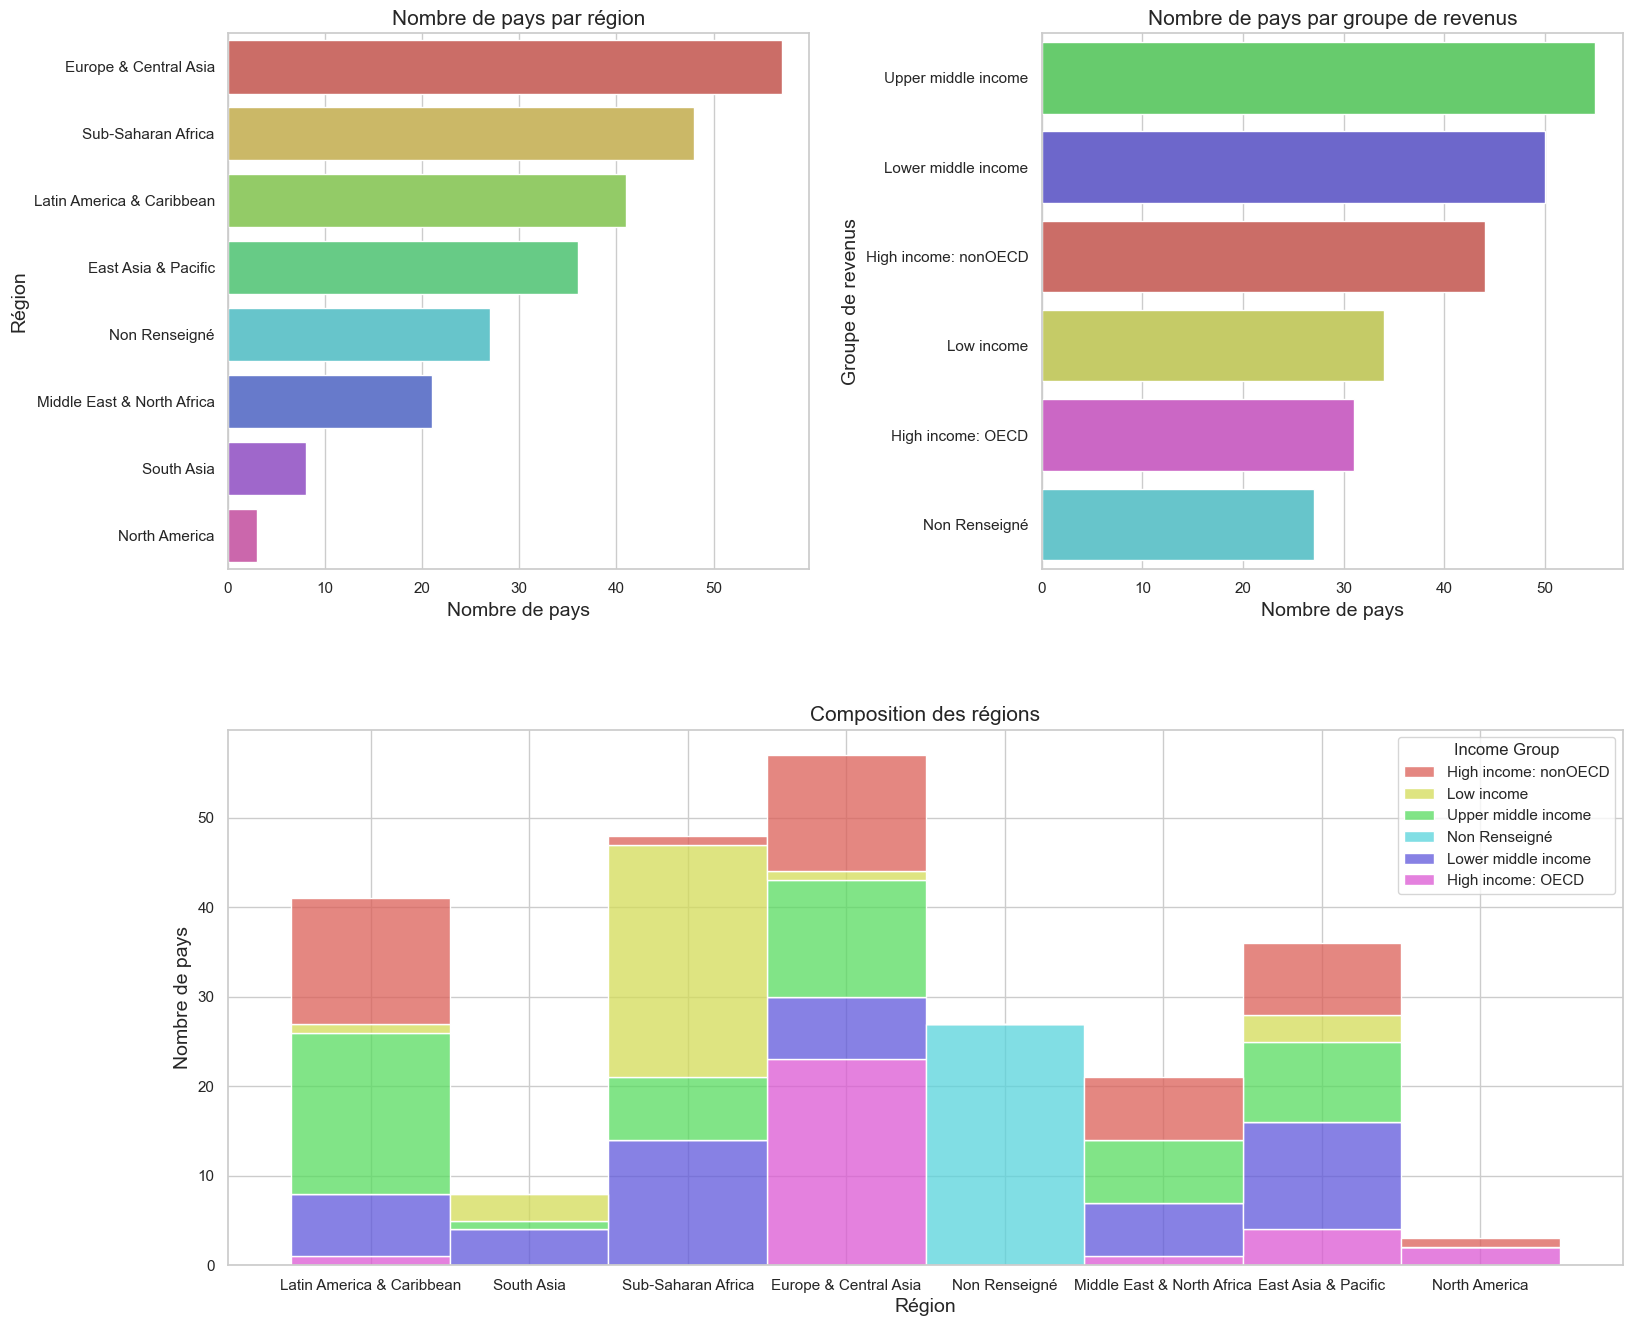

In [22]:
plt.figure(figsize=(18,16))
grid = plt.GridSpec(2, 2, wspace=0.4, hspace=0.3)

#Définition d'une couleur pour chaque valeur de groupe de revenus
Groupe_revenus=Df_country["Income Group"].unique()
colors = sns.color_palette("hls", len(Groupe_revenus))
palette = {groupe: color for groupe, color in zip(Groupe_revenus, colors)}

#Nombre de pays par région géographique
plt.subplot(grid[0,0])
sns.barplot(x=pays_region["Country Code"], y=pays_region["Region"],palette="hls");
plt.xlabel("Nombre de pays", fontsize=14)
plt.ylabel("Région", fontsize=14)
plt.title("Nombre de pays par région", fontsize=15);

#Nbr pays par groupe de revenus
plt.subplot(grid[0,1])
sns.barplot(x=pays_income["Country Code"], y=pays_income["Income Group"],palette=palette);
plt.xlabel("Nombre de pays", fontsize=14)
plt.ylabel("Groupe de revenus", fontsize=14)
plt.title("Nombre de pays par groupe de revenus", fontsize=15);

#Nbr pays par groupe de revenus au sein d'une region
plt.subplot(grid[1,0:])
sns.histplot(data= Df_country, x="Region", hue="Income Group", multiple="stack",palette=palette)
plt.xlabel("Région", fontsize=14)
plt.ylabel("Nombre de pays", fontsize=14)
plt.title("Composition des régions", fontsize=15);



Les pays pour lesquels les colonnes Region et Income Group ne sont pas renseignées sont les mêmes.

In [23]:
Df_country.loc[Df_country["Region"]=="Non Renseigné"]

Country Code                                      Short Name  \
5            ARB                                      Arab World   
57           EAP           East Asia & Pacific (developing only)   
58           EAS         East Asia & Pacific (all income levels)   
59           ECA         Europe & Central Asia (developing only)   
60           ECS       Europe & Central Asia (all income levels)   
63           EMU                                       Euro area   
68           EUU                                  European Union   
78           GIB                                       Gibraltar   
89           HIC                                     High income   
92           HPC          Heavily indebted poor countries (HIPC)   
116          LAC     Latin America & Caribbean (developing only)   
122          LCN   Latin America & Caribbean (all income levels)   
123          LDC    Least developed countries: UN classification   
124          LIC                                      Low income   
127          LMC                             Lower middle income   
128          LMY                             Low & middle income   
140          MEA  Middle East & North Africa (all income levels)   
143          MIC                                   Middle income   
148          MNA    Middle East & North Africa (developing only)   
157          NAC                                   North America   
166          NRU                                           Nauru   
168          OED                                    OECD members   
187          SAS                                      South Asia   
198          SSA            Sub-Saharan Africa (developing only)   
200          SSF          Sub-Saharan Africa (all income levels)   
225          UMC                             Upper middle income   
234          WLD                                           World   

                                         Table Name  \
5                                        Arab World   
57                              East Asia & Pacific   
58          East Asia & Pacific (all income levels)   
59                            Europe & Central Asia   
60        Europe & Central Asia (all income levels)   
63                                        Euro area   
68                                   European Union   
78                                        Gibraltar   
89                                      High income   
92           Heavily indebted poor countries (HIPC)   
116                       Latin America & Caribbean   
122   Latin America & Caribbean (all income levels)   
123    Least developed countries: UN classification   
124                                      Low income   
127                             Lower middle income   
128                             Low & middle income   
140  Middle East & North Africa (all income levels)   
143                                   Middle income   
148                      Middle East & North Africa   
157                                   North America   
166                                           Nauru   
168                                    OECD members   
187                                      South Asia   
198                              Sub-Saharan Africa   
200          Sub-Saharan Africa (all income levels)   
225                             Upper middle income   
234                                           World   

                                          Long Name 2-alpha code  \
5                                        Arab World           1A   
57            East Asia & Pacific (developing only)           4E   
58          East Asia & Pacific (all income levels)           Z4   
59          Europe & Central Asia (developing only)           7E   
60        Europe & Central Asia (all income levels)           Z7   
63                                        Euro area           XC   
68                                   European Union           EU   
78            

Il n'y a pas que des pays dans notre fichier, on a aussi :
-groupement par zone géographique
-groupement par revenus
-groupement par institution
-monde entier
Ils ne sont pas intéressant dans ce fichier-ci, mais si des données sont présentes dans le fichier EdStatsData, ces groupements permettront d'avoir les valeurs moyennes par groupement

## 2.3 Analyse du fichier EdStatsCountry-Series <a class="anchor" id="section_2_3"></a>

In [24]:
Df_country_Series.head(3)

CountryCode   SeriesCode                                        DESCRIPTION  \
0         ABW  SP.POP.TOTL  Data sources : United Nations World Population...   
1         ABW  SP.POP.GROW  Data sources: United Nations World Population ...   
2         AFG  SP.POP.GROW  Data sources: United Nations World Population ...   

   Unnamed: 3  
0         NaN  
1         NaN  
2         NaN

In [25]:
Df_country_Series.dtypes

CountryCode     object
SeriesCode      object
DESCRIPTION     object
Unnamed: 3     float64
dtype: object

In [26]:
Df_country_Series.describe()
#La colonne Unnamed 3 sera à supprimer

Unnamed: 3
count         0.0
mean          NaN
std           NaN
min           NaN
25%           NaN
50%           NaN
75%           NaN
max           NaN

In [27]:
Df_country_Series.describe(include=object)

CountryCode   SeriesCode  \
count          613          613   
unique         211           21   
top            MDA  SP.POP.TOTL   
freq            18          211   

                                              DESCRIPTION  
count                                                 613  
unique                                                 97  
top     Data sources : United Nations World Population...  
freq                                                  154

On a seulement 211 CountryCode unique, c'est 30 de moins que dans le fichier EdStatsCountry.

In [28]:
# Regardons quelles sont les différences entre ces deux colonne Country Code

Df_country.loc[~Df_country["Country Code"].isin(Df_country_Series["CountryCode"].unique())]

Country Code                                      Short Name  \
5            ARB                                      Arab World   
47           CUW                                         Curaçao   
57           EAP           East Asia & Pacific (developing only)   
58           EAS         East Asia & Pacific (all income levels)   
59           ECA         Europe & Central Asia (developing only)   
60           ECS       Europe & Central Asia (all income levels)   
63           EMU                                       Euro area   
68           EUU                                  European Union   
89           HIC                                     High income   
92           HPC          Heavily indebted poor countries (HIPC)   
116          LAC     Latin America & Caribbean (developing only)   
122          LCN   Latin America & Caribbean (all income levels)   
123          LDC    Least developed countries: UN classification   
124          LIC                                      Low income   
127          LMC                             Lower middle income   
128          LMY                             Low & middle income   
134          MAF                        St. Martin (French part)   
140          MEA  Middle East & North Africa (all income levels)   
143          MIC                                   Middle income   
148          MNA    Middle East & North Africa (developing only)   
157          NAC                                   North America   
166          NRU                                           Nauru   
168          OED                                    OECD members   
187          SAS                                      South Asia   
198          SSA            Sub-Saharan Africa (developing only)   
199          SSD                                     South Sudan   
200          SSF          Sub-Saharan Africa (all income levels)   
207          SXM                       Sint Maarten (Dutch part)   
225          UMC                             Upper middle income   
234          WLD                                           World   

                                         Table Name  \
5                                        Arab World   
47                                          Curaçao   
57                              East Asia & Pacific   
58          East Asia & Pacific (all income levels)   
59                            Europe & Central Asia   
60        Europe & Central Asia (all income levels)   
63                                        Euro area   
68                                   European Union   
89                                      High income   
92           Heavily indebted poor countries (HIPC)   
116                       Latin America & Caribbean   
122   Latin America & Caribbean (all income levels)   
123    Least developed countries: UN classification   
124                                      Low income   
127                             Lower middle income   
128                             Low & middle income   
134                        St. Martin (French part)   
140  Middle East & North Africa (all income levels)   
143                                   Middle income   
148                      Middle East & North Africa   
157                                   North America   
166                                           Nauru   
168                                    OECD members   
187                                      South Asia   
198                              Sub-Saharan Africa   
199                                     South Sudan   
200          Sub-Saharan Africa (all income levels)   
207                       Sint Maarten (Dutch part)   
225                             Upper middle income   
234                                           World   

                                          Long Name 2-alpha code  \
5                                        Arab World           1A   
47                                          Curaçao  

Le fichier EdStatsCountry-Series ne contient pas les regroupements mentionnés dans le fichier EdStatsCountry, mais il manque aussi 4 pays/région autonome : Curaçao, St Martin, Sint Maarten et le Soudan du Sud.

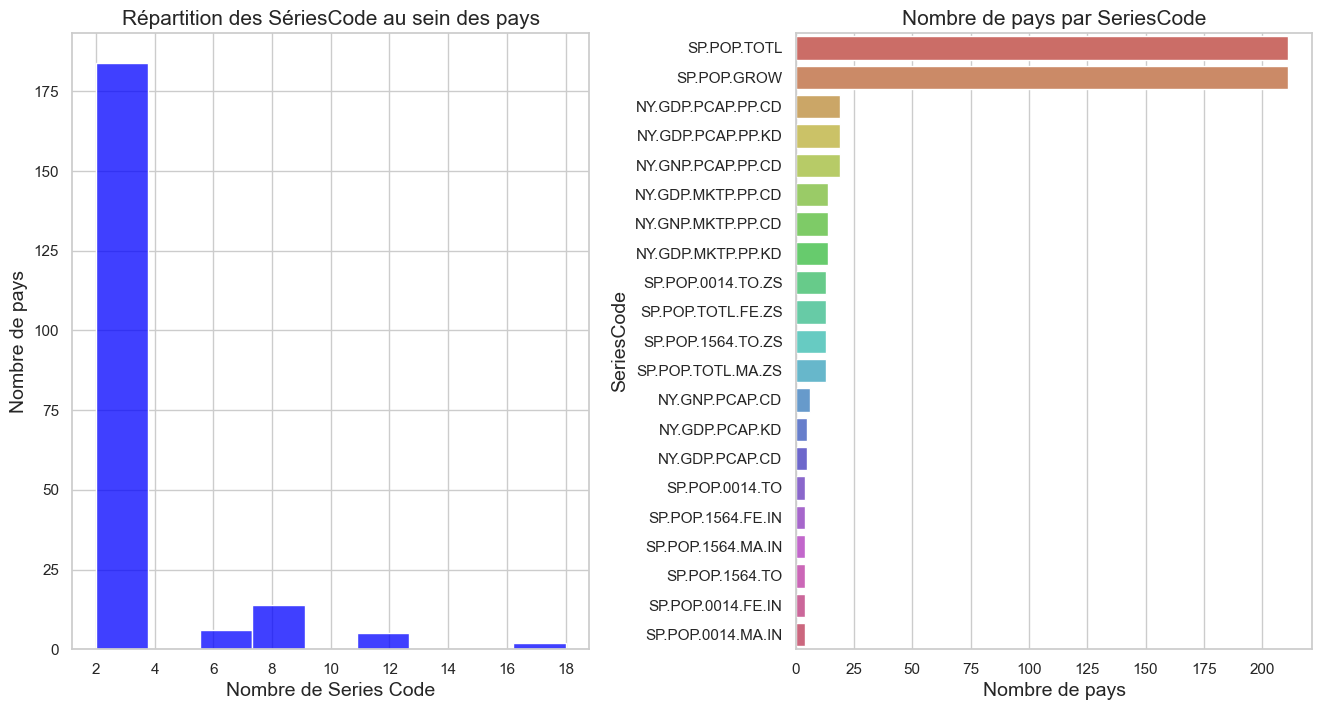

In [29]:
plt.figure(figsize=(16,8))
grid = plt.GridSpec(1, 2, wspace=0.4, hspace=0.3)

#Nbr pays en fct de leur nbr de SeriesCode
nb_SeriesCode_par_pays=Df_country_Series.groupby(Df_country_Series["CountryCode"])["SeriesCode"].count().reset_index().sort_values(by="SeriesCode", ascending=False)
plt.subplot(grid[0,0])
sns.histplot(nb_SeriesCode_par_pays["SeriesCode"],color="blue")
plt.xlabel("Nombre de Series Code", fontsize=14)
plt.ylabel("Nombre de pays", fontsize=14)
plt.title("Répartition des SériesCode au sein des pays", fontsize=15);

#les indicateurs qui sont les plus représentés
nb_pays_par_SeriesCode=Df_country_Series.groupby(Df_country_Series["SeriesCode"])["CountryCode"].count().reset_index().sort_values(by="CountryCode", ascending=False)
plt.subplot(grid[0,1])
sns.barplot(x=nb_pays_par_SeriesCode["CountryCode"], y=nb_pays_par_SeriesCode["SeriesCode"],palette="hls");
plt.xlabel("Nombre de pays", fontsize=14)
plt.ylabel("SeriesCode", fontsize=14)
plt.title("Nombre de pays par SeriesCode", fontsize=15);

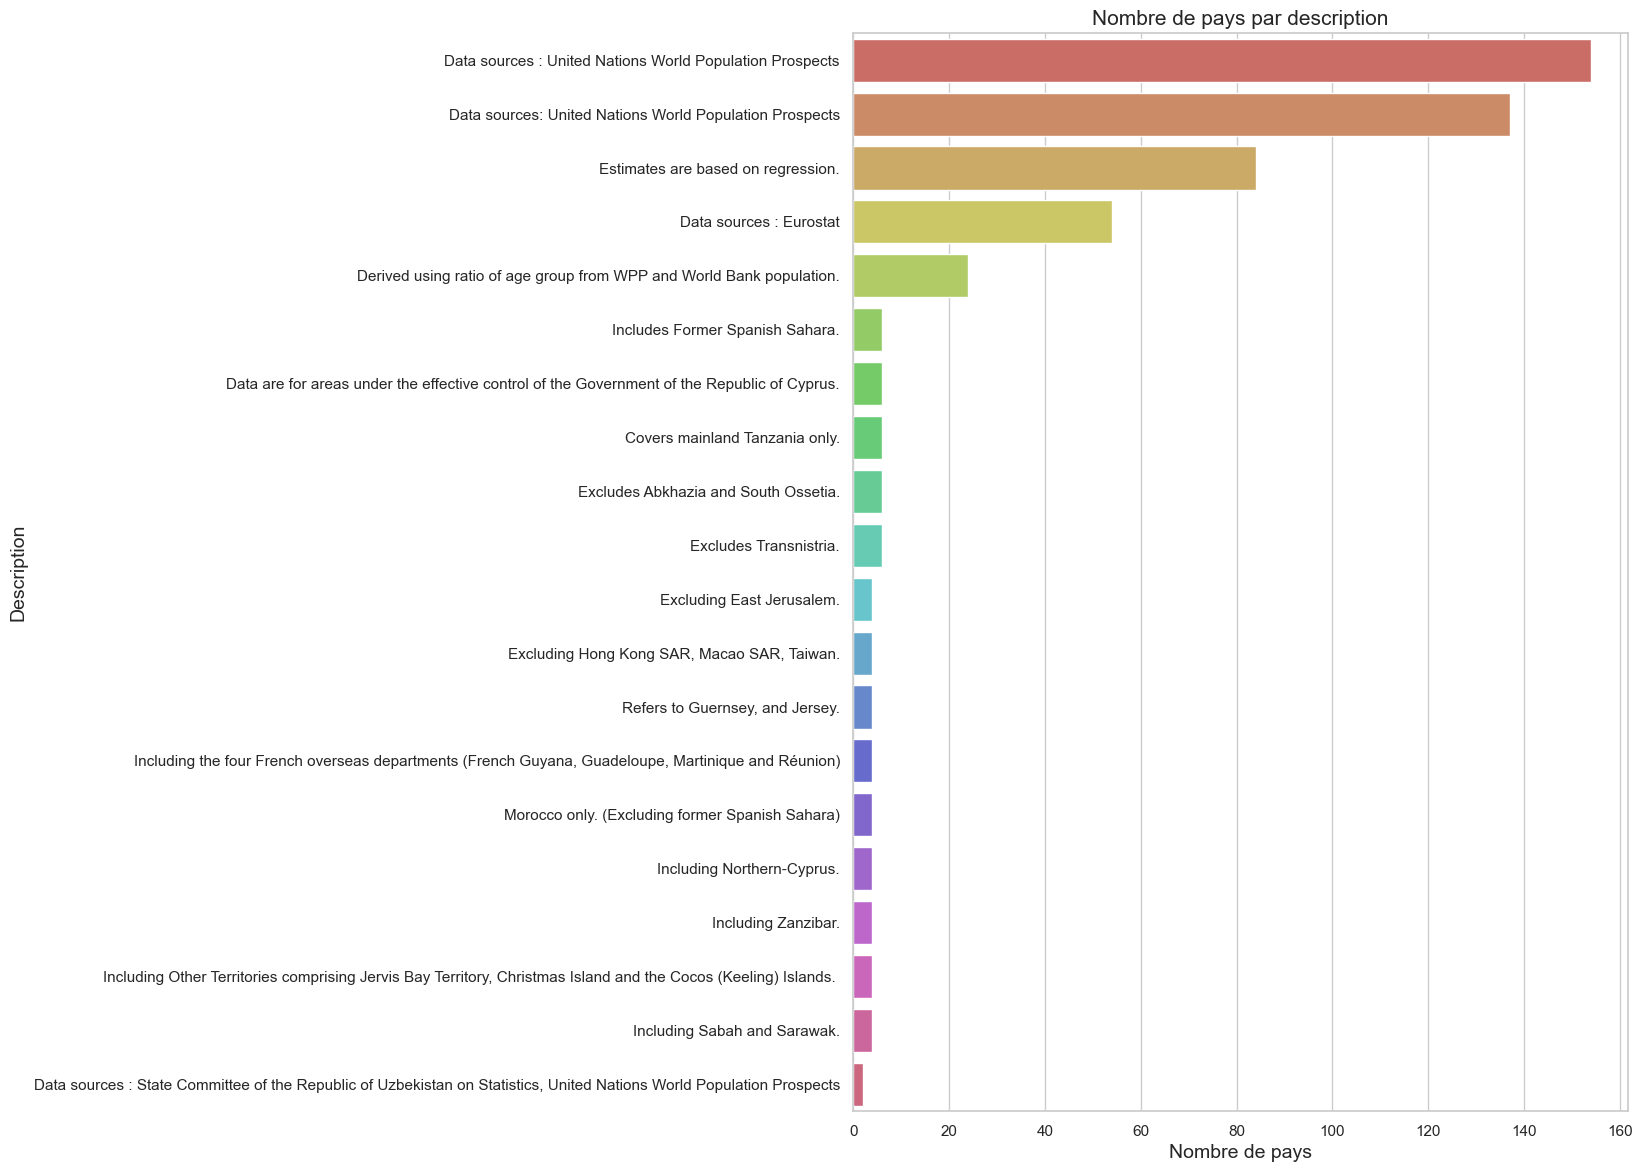

In [30]:
plt.figure(figsize=(10,14))
nb_pays_par_Description=Df_country_Series.groupby(Df_country_Series["DESCRIPTION"])["CountryCode"].count().reset_index().sort_values(by="CountryCode", ascending=False).head(20)
sns.barplot(x=nb_pays_par_Description["CountryCode"], y=nb_pays_par_Description["DESCRIPTION"],palette="hls");
plt.xlabel("Nombre de pays", fontsize=14)
plt.ylabel("Description", fontsize=14)
plt.title("Nombre de pays par description", fontsize=15);

## 2.4 Analyse du fichier EdStatsData <a class="anchor" id="section_2_4"></a>

In [31]:
Df_Data.head(3)

Country Name Country Code  \
0   Arab World          ARB   
1   Arab World          ARB   
2   Arab World          ARB   

                                      Indicator Name  Indicator Code  1970  \
0  Adjusted net enrolment rate, lower secondary, ...      UIS.NERA.2   NaN   
1  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.F   NaN   
2  Adjusted net enrolment rate, lower secondary, ...  UIS.NERA.2.GPI   NaN   

   1971  1972  1973  1974  1975  1976  1977  1978  1979  1980  1981  1982  \
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   1983  1984  1985  1986  1987  1988  1989  1990  1991  1992  1993  1994  \
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   1995  1996  1997  1998  1999  2000  2001  2002  2003  2004  2005  2006  \
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   2007  2008  2009  2010  2011  2012  2013  2014  2015  2016  2017  2020  \
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   2025  2030  2035  2040  2045  2050  2055  2060  2065  2070  2075  2080  \
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   2085  2090  2095  2100  Unnamed: 69  
0   NaN   NaN   NaN   NaN          NaN  
1   NaN   NaN   NaN   NaN          NaN  
2   NaN   NaN   NaN   NaN          NaN

In [32]:
Df_Data.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1970              float64
1971              float64
1972              float64
1973              float64
1974              float64
1975              float64
1976              float64
1977              float64
1978              float64
1979              float64
1980              float64
1981              float64
1982              float64
1983              float64
1984              float64
1985              float64
1986              float64
1987              float64
1988              float64
1989              float64
1990              float64
1991              float64
1992              float64
1993              float64
1994              float64
1995              float64
1996              float64
1997              float64
1998              float64
1999              float64
2000              float64
2001              float64
2002              float64
2003              float64
2004        

In [33]:
#Varaible qualitative
Df_Data.describe(include=object)

Country Name Country Code  \
count        886930       886930   
unique          242          242   
top      Arab World          ARB   
freq           3665         3665   

                                           Indicator Name Indicator Code  
count                                              886930         886930  
unique                                               3665           3665  
top     Adjusted net enrolment rate, lower secondary, ...     UIS.NERA.2  
freq                                                  242            242

In [34]:
#Variable quantitative
Df_Data.describe()
#colonne Unnamed:69 à supprimer car vide

1970          1971          1972          1973          1974  \
count  7.228800e+04  3.553700e+04  3.561900e+04  3.554500e+04  3.573000e+04   
mean   1.974772e+09  4.253638e+09  4.592365e+09  5.105006e+09  5.401493e+09   
std    1.211687e+11  1.804814e+11  1.914083e+11  2.059170e+11  2.112150e+11   
min   -1.435564e+00 -1.594625e+00 -3.056522e+00 -4.032582e+00 -4.213563e+00   
25%    8.900000e-01  8.853210e+00  9.240920e+00  9.595200e+00  9.861595e+00   
50%    6.317724e+00  6.316240e+01  6.655139e+01  6.969595e+01  7.087760e+01   
75%    6.251250e+01  5.655200e+04  5.863650e+04  6.202900e+04  6.383675e+04   
max    1.903929e+13  1.986457e+13  2.100916e+13  2.238367e+13  2.282991e+13   

               1975          1976          1977          1978          1979  \
count  8.730600e+04  3.748300e+04  3.757400e+04  3.757600e+04  3.680900e+04   
mean   2.314288e+09  5.731808e+09  6.124437e+09  6.671489e+09  7.436724e+09   
std    1.375059e+11  2.215546e+11  2.325489e+11  2.473986e+11  2.660957e+11   
min   -3.658569e+00 -2.950945e+00 -3.174870e+00 -3.558749e+00 -2.973612e+00   
25%    1.400000e+00  9.312615e+00  9.519913e+00  1.000000e+01  1.000000e+01   
50%    9.677420e+00  7.101590e+01  7.133326e+01  7.290512e+01  7.510173e+01   
75%    7.854163e+01  5.682800e+04  5.739175e+04  5.940425e+04  6.411500e+04   
max    2.300634e+13  2.424128e+13  2.521383e+13  2.622101e+13  2.730873e+13   

               1980          1981          1982          1983          1984  \
count  8.912200e+04  3.877700e+04  3.751100e+04  3.846000e+04  3.860600e+04   
mean   3.283898e+09  7.664969e+09  7.913722e+09  7.856908e+09  8.118002e+09   
std    1.780774e+11  2.744142e+11  2.790549e+11  2.823809e+11  2.940635e+11   
min   -1.404240e+00 -1.478345e+00 -2.358765e+00 -2.867273e+00 -2.800548e+00   
25%    1.770000e+00  9.468690e+00  9.989330e+00  9.581825e+00  9.068048e+00   
50%    1.107000e+01  7.467213e+01  7.710972e+01  7.592528e+01  7.533138e+01   
75%    8.202760e+01  6.310400e+04  6.923300e+04  6.304125e+04  6.360700e+04   
max    2.784319e+13  2.837926e+13  2.848067e+13  2.916436e+13  3.048521e+13   

               1985          1986          1987          1988          1989  \
count  9.029600e+04  3.937200e+04  3.864100e+04  3.855200e+04  3.754000e+04   
mean   3.622763e+09  9.156550e+09  1.014901e+10  1.104709e+10  1.195436e+10   
std    2.002929e+11  3.264675e+11  3.535351e+11  3.804257e+11  4.014873e+11   
min   -2.216315e+00 -1.556722e+00 -1.410886e+00 -1.425202e+00 -1.562425e+00   
25%    2.150000e+00  9.332923e+00  9.595330e+00  9.715503e+00  9.679637e+00   
50%    1.200000e+01  7.409428e+01  7.357014e+01  7.354275e+01  7.935322e+01   
75%    8.338313e+01  6.608525e+04  7.001100e+04  7.597875e+04  8.558375e+04   
max    3.166465e+13  3.271284e+13  3.388244e+13  3.545738e+13  3.678741e+13   

               1990          1991          1992          1993          1994  \
count  1.244050e+05  7.443700e+04  7.554300e+04  7.579300e+04  7.746200e+04   
mean   9.084424e+09  1.571674e+10  1.604668e+10  1.643532e+10  1.684022e+10   
std    3.665667e+11  4.881357e+11  5.012055e+11  5.121962e+11  5.292982e+11   
min   -1.803750e+00 -5.814339e+00 -5.089333e+00 -6.184857e+00 -4.792691e+00   
25%    4.830000e+00  5.134554e+01  4.933854e+01  4.944877e+01  4.783283e+01   
50%    5.048379e+01  3.916000e+04  3.477300e+04  3.497100e+04  3.182500e+04   
75%    9.134300e+04  4.383130e+05  4.246125e+05  4.316250e+05  4.244605e+05   
max    4.714344e+13  4.781272e+13  4.866446e+13  4.959600e+13  5.106581e+13   

               1995          1996          1997          1998          1999  \
count  1.313610e+05  7.680700e+04  7.345300e+04  8.491400e+04  1.188390e+05   
mean   1.052543e+10  1.874630e+10  2.027385e+10  1.794678e+10  1.331558e+10   
std    4.285218e+11  5.812586e+11  6.142357e+11  5.859148e+11  5.153472e+11   
min   -2.697722e+00 -3.820174e+00 -2.517245e+00 -6.086200e+04 -6.526000e+04   
25%    5.200000e+00  4.836486e+01  5.510854e+01  3.346871e+0

In [35]:
#Il semble y avoir 242 pays différent dans le fichier EdStatsData, comparons les avec ceux du fichier EdStatsCountry
np.isin(Df_Data["Country Code"].unique(),Df_country["Country Code"].unique()).sum()

241

In [36]:
#Il y a donc 1 pays en plus dans le fichier EdStatsData par rapport au fichier EdStatsCountry, cherchons le :
Df_Data["Country Code"].loc[~np.isin(Df_Data["Country Code"],Df_country["Country Code"].unique())].unique()

array(['VGB'], dtype=object)

In [37]:
print(len(Df_Data.loc[~np.isin(Df_Data["Country Code"],Df_country["Country Code"].unique())]))
Df_Data.loc[~np.isin(Df_Data["Country Code"],Df_country["Country Code"].unique())].iloc[:,4:-1].notna().mean()*100

3665


1970    0.272851
1971    0.791269
1972    0.682128
1973    0.845839
1974    0.600273
1975    1.036835
1976    1.036835
1977    0.327422
1978    0.327422
1979    1.036835
1980    0.354707
1981    1.064120
1982    0.190996
1983    0.873124
1984    1.145975
1985    0.845839
1986    0.190996
1987    0.190996
1988    0.190996
1989    0.190996
1990    0.900409
1991    1.145975
1992    0.900409
1993    0.218281
1994    0.982265
1995    0.572988
1996    0.190996
1997    0.190996
1998    0.218281
1999    1.800819
2000    1.391542
2001    1.391542
2002    2.537517
2003    2.100955
2004    2.100955
2005    1.964529
2006    1.882674
2007    1.937244
2008    0.409277
2009    2.837653
2010    1.637108
2011    1.773533
2012    1.309686
2013    1.364256
2014    1.882674
2015    2.510232
2016    0.381992
2017    0.000000
2020    0.000000
2025    0.000000
2030    0.000000
2035    0.000000
2040    0.000000
2045    0.000000
2050    0.000000
2055    0.000000
2060    0.000000
2065    0.000000
2070    0.0000

In [38]:
#Regardons si chaque pays possède le même nombre d'indicateur
Df_Data.groupby(Df_Data["Indicator Name"])["Country Code"].count().sort_values()
#la réponse est oui !

Indicator Name
Adjusted net enrolment rate, lower secondary, both sexes (%)                                       242
Population, ages 10-18, male                                                                       242
Population, ages 10-18, total                                                                      242
Population, ages 11-15, female                                                                     242
Population, ages 11-15, male                                                                       242
                                                                                                  ... 
Expenditure on education not allocated by level as % of government expenditure on education (%)    242
Expenditure on lower secondary as % of government expenditure on education (%)                     242
Expenditure on lower secondary as % of total government expenditure (%)                            242
Expenditure on post-secondary non-tertiary as % of total g

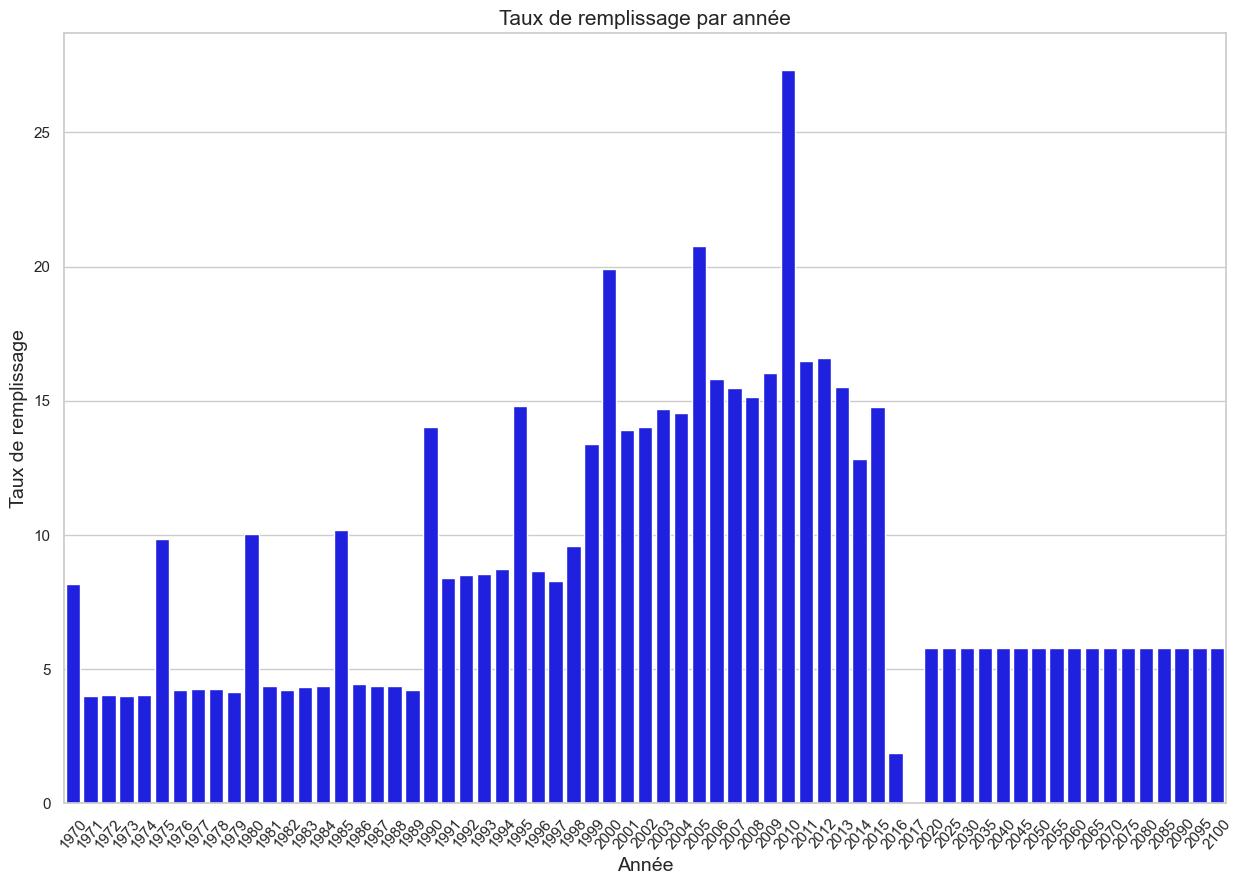

In [39]:
#Regardons le remplissage des variables quantitatives (ici il s'agit des colonnes correspondant aux années)
plt.figure(figsize=(15,10))
Data_plot=Df_Data.iloc[:,4:-1].notna().mean()*100
Data_plot=Data_plot.reset_index()
Data_plot.rename(columns={"index":"Année",0:"Taux remplissage"},inplace=True)
barplot=sns.barplot(data=Data_plot,x=Data_plot["Année"],y=Data_plot["Taux remplissage"],color="blue")
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=50)
plt.xlabel("Année", fontsize=14)
plt.ylabel("Taux de remplissage", fontsize=14)
plt.title("Taux de remplissage par année", fontsize=15);

On remarque un taux de remplissage inférieur à 10% avant 2000 et après 2015, se concentrer sur la période comprise entre ces années permettra de limiter les biais liés aux manques de données. On remarque que le taux de remplissage à partir de 2020 est constant, il faudra s'y interresser pour anticipier les évolutions à venir sur certain indicateur. La fréquence d'actualisation de certains indicateur semnle être de 5 ans (cf pic sur le graphique)


## 2.5 Analyse du fichier EdStatsFootNote <a class="anchor" id="section_2_5"></a>

In [40]:
Df_Foot.head(3)

CountryCode      SeriesCode    Year          DESCRIPTION  Unnamed: 4
0         ABW  SE.PRE.ENRL.FE  YR2001  Country estimation.         NaN
1         ABW  SE.TER.TCHR.FE  YR2005  Country estimation.         NaN
2         ABW  SE.PRE.TCHR.FE  YR2000  Country estimation.         NaN

In [41]:
Df_Foot.dtypes

CountryCode     object
SeriesCode      object
Year            object
DESCRIPTION     object
Unnamed: 4     float64
dtype: object

In [42]:
Df_Foot.describe()
#Colonne Unnamed: 4 vide, à supprimer

Unnamed: 4
count         0.0
mean          NaN
std           NaN
min           NaN
25%           NaN
50%           NaN
75%           NaN
max           NaN

In [43]:
Df_Foot.describe(include=object)

CountryCode   SeriesCode    Year   DESCRIPTION
count       643638       643638  643638        643638
unique         239         1558      56          9102
top            LIC  SH.DYN.MORT  YR2004  Country Data
freq          7320         9226   27128        191188

In [44]:
#Il semble y avoir 239 pays différent dans le fichier EdStatsFootNote, comparons les avec ceux du fichier EdStatsCountry
np.isin(Df_country["Country Code"].unique(),Df_Foot["CountryCode"].unique()).sum()

238

In [45]:
Df_country["Country Code"].loc[~np.isin(Df_country["Country Code"],Df_Foot["CountryCode"].unique())].unique()

array(['GRL', 'MAF', 'SXM'], dtype=object)

In [46]:
np.isin(Df_Data["Country Code"].unique(),Df_Foot["CountryCode"].unique()).sum()

239

In [47]:
Df_Data["Country Code"].loc[~np.isin(Df_Data["Country Code"],Df_Foot["CountryCode"].unique())].unique()

array(['GRL', 'SXM', 'MAF'], dtype=object)

3 pays ne sont pas présent dans le fichier EdStatsFootNote (Groenland, Sint Maarten et Saint Martin), en revanche celui-ci contient bien les Iles vierges britanniques

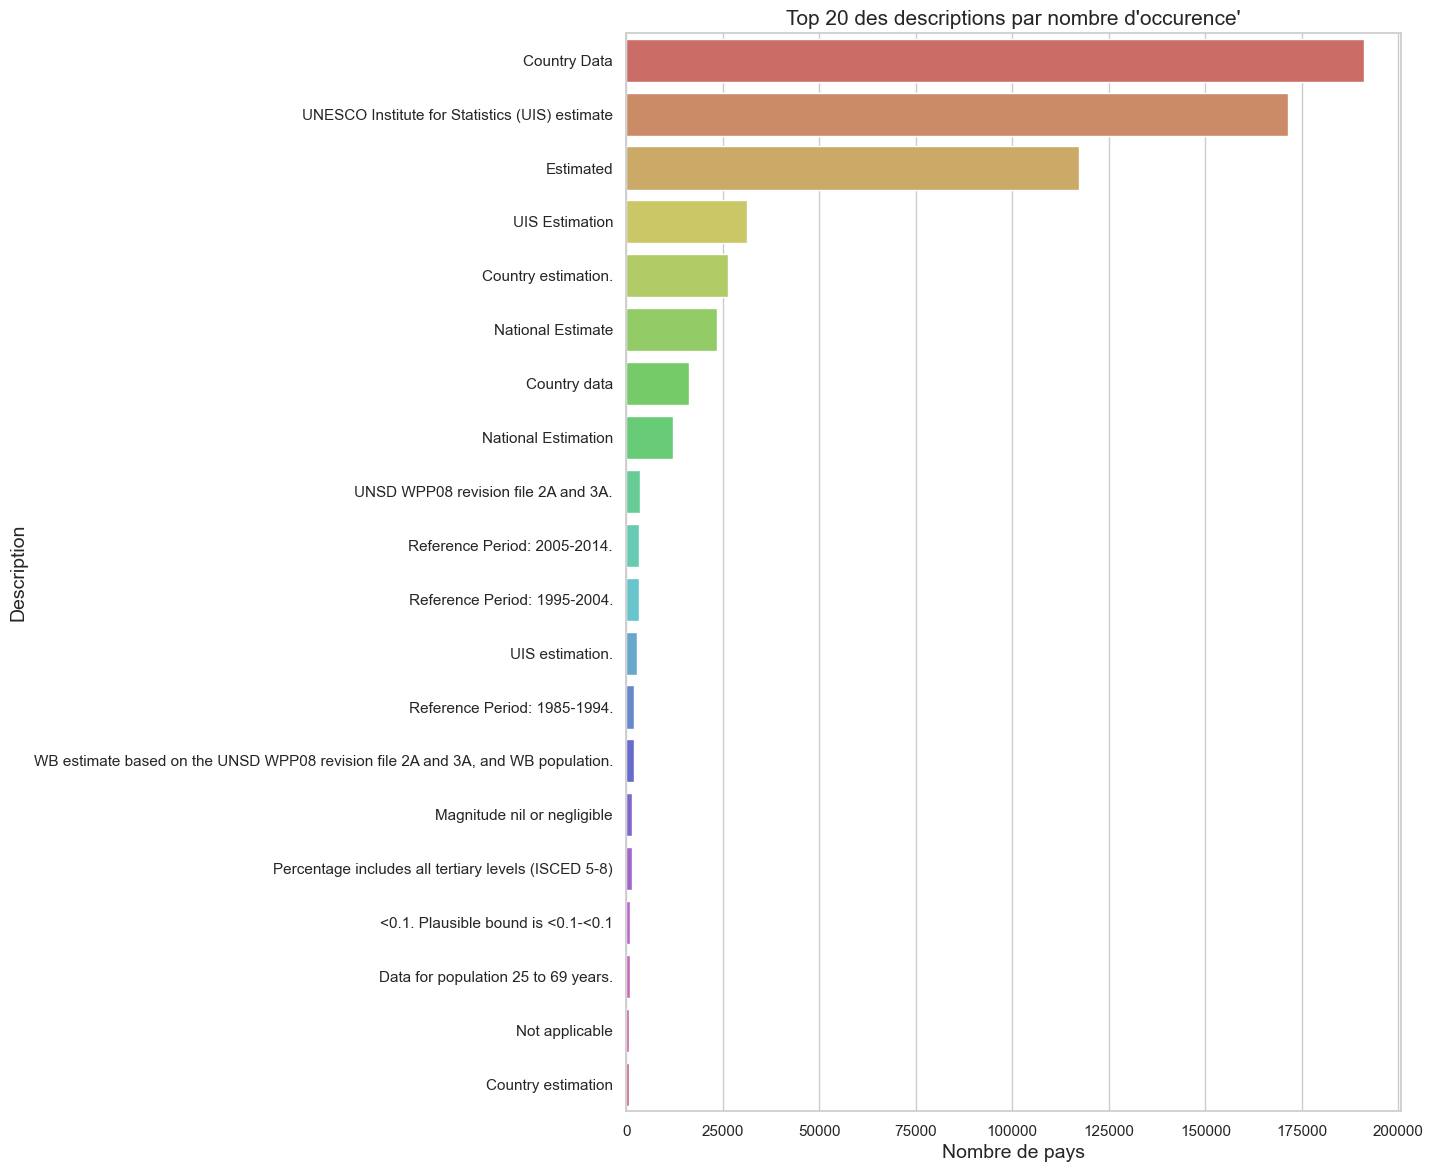

In [48]:
#Regardons les 20 descriptions qui reviennent le plus souvent
plt.figure(figsize=(10,14))
nb_Description=Df_Foot.groupby(Df_Foot["DESCRIPTION"])["CountryCode"].count().reset_index().sort_values(by="CountryCode", ascending=False).head(20)
sns.barplot(x=nb_Description["CountryCode"], y=nb_Description["DESCRIPTION"],palette="hls");
plt.xlabel("Nombre de pays", fontsize=14)
plt.ylabel("Description", fontsize=14)
plt.title("Top 20 des descriptions par nombre d'occurence'", fontsize=15);

In [49]:
#Regardons le nombre de mise à jour par pays et par SeriesCode
#Pour cela transformons la colonne Year pour obtenir une variable de type int
Df_Foot["Year"] = Df_Foot["Year"].str[2:]


In [50]:
Df_Foot["Year"]=Df_Foot["Year"].astype(int)
Df_Foot

CountryCode      SeriesCode  Year  \
0              ABW  SE.PRE.ENRL.FE  2001   
1              ABW  SE.TER.TCHR.FE  2005   
2              ABW  SE.PRE.TCHR.FE  2000   
3              ABW  SE.SEC.ENRL.GC  2004   
4              ABW     SE.PRE.TCHR  2006   
...            ...             ...   ...   
643633         ZWE     SH.DYN.MORT  2007   
643634         ZWE     SH.DYN.MORT  2014   
643635         ZWE     SH.DYN.MORT  2015   
643636         ZWE     SH.DYN.MORT  2017   
643637         ZWE     SP.POP.GROW  2017   

                                   DESCRIPTION  Unnamed: 4  
0                          Country estimation.         NaN  
1                          Country estimation.         NaN  
2                          Country estimation.         NaN  
3                          Country estimation.         NaN  
4                          Country estimation.         NaN  
...                                        ...         ...  
643633       Uncertainty bound is 91.6 - 109.3         NaN  
643634          Uncertainty bound is 54.3 - 76         NaN  
643635        Uncertainty bound is 48.3 - 73.3         NaN  
643636  5-year average value between 0s and 5s         NaN  
643637  5-year average value between 0s and 5s         NaN  

[643638 rows x 5 columns]

In [51]:
nbr_maj_pays_seriescode = Df_Foot.pivot_table(index="CountryCode", columns="SeriesCode", values="Year",aggfunc="count")

In [52]:
plt.figure(figsize=(400,100))
sns.heatmap(nbr_maj_pays_seriescode);
#On remarque d'importante disparité en focntion des indicateurs, pour ce qui est des pays, un patern se distingue

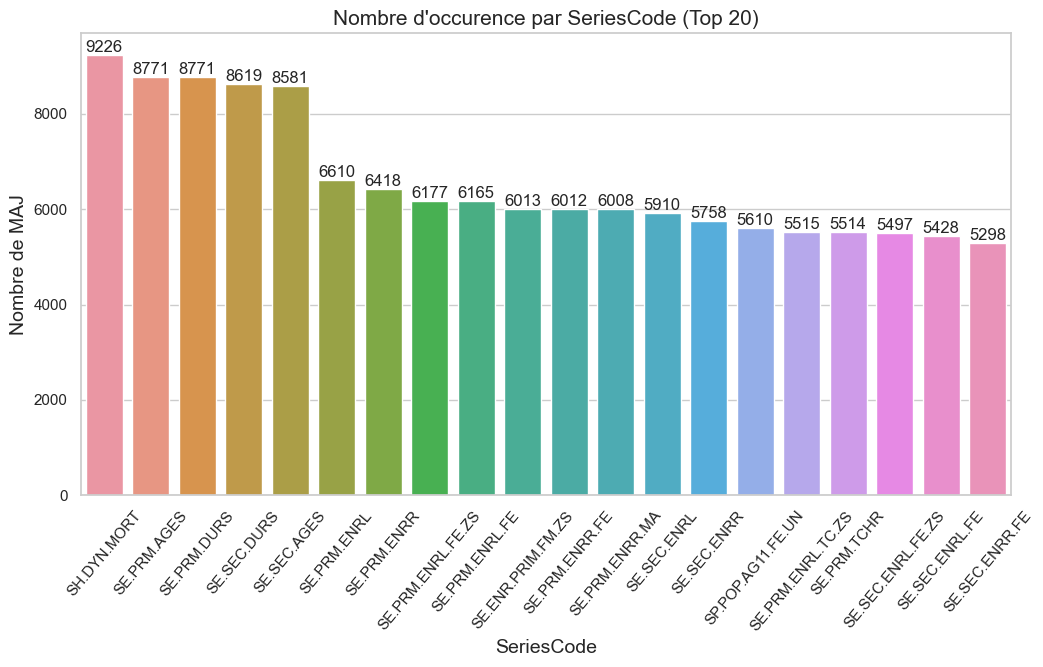

In [53]:
plt.figure(figsize=(12,6))
nbr_maj_seriescode=nbr_maj_pays_seriescode.sum().sort_values(ascending=False).head(20)
barplot=sns.barplot(x=nbr_maj_seriescode.index, y=nbr_maj_seriescode)
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=50)
plt.xlabel("SeriesCode", fontsize=14)
plt.ylabel("Nombre de MAJ", fontsize=14)
plt.title("Nombre d'occurence par SeriesCode (Top 20)", fontsize=15)
barplot.bar_label(barplot.containers[0]);

## 2.6 Analyse du fichier EdStatsSeries <a class="anchor" id="section_2_6"></a>

In [54]:
Df_Series.head(3)

Series Code       Topic  \
0  BAR.NOED.1519.FE.ZS  Attainment   
1     BAR.NOED.1519.ZS  Attainment   
2  BAR.NOED.15UP.FE.ZS  Attainment   

                                      Indicator Name  \
0  Barro-Lee: Percentage of female population age...   
1  Barro-Lee: Percentage of population age 15-19 ...   
2  Barro-Lee: Percentage of female population age...   

                                    Short definition  \
0  Percentage of female population age 15-19 with...   
1  Percentage of population age 15-19 with no edu...   
2  Percentage of female population age 15+ with n...   

                                     Long definition  Unit of measure  \
0  Percentage of female population age 15-19 with...              NaN   
1  Percentage of population age 15-19 with no edu...              NaN   
2  Percentage of female population age 15+ with n...              NaN   

  Periodicity Base Period Other notes Aggregation method  \
0         NaN         NaN         NaN                NaN   
1         NaN         NaN         NaN                NaN   
2         NaN         NaN         NaN                NaN   

  Limitations and exceptions  Notes from original source General comments  \
0                        NaN                         NaN              NaN   
1                        NaN                         NaN              NaN   
2                        NaN                         NaN              NaN   

                                              Source  \
0  Robert J. Barro and Jong-Wha Lee: http://www.b...   
1  Robert J. Barro and Jong-Wha Lee: http://www.b...   
2  Robert J. Barro and Jong-Wha Lee: http://www.b...   

  Statistical concept and methodology Development relevance  \
0                                 NaN                   NaN   
1                                 NaN                   NaN   
2                                 NaN                   NaN   

  Related source links  Other web links  Related indicators  License Type  \
0                  NaN              NaN                 NaN           NaN   
1                  NaN              NaN                 NaN           NaN   
2                  NaN              NaN                 NaN           NaN   

   Unnamed: 20  
0          NaN  
1          NaN  
2          NaN

In [55]:
Df_Series.dtypes

Series Code                             object
Topic                                   object
Indicator Name                          object
Short definition                        object
Long definition                         object
Unit of measure                        float64
Periodicity                             object
Base Period                             object
Other notes                             object
Aggregation method                      object
Limitations and exceptions              object
Notes from original source             float64
General comments                        object
Source                                  object
Statistical concept and methodology     object
Development relevance                   object
Related source links                    object
Other web links                        float64
Related indicators                     float64
License Type                           float64
Unnamed: 20                            float64
dtype: object

In [56]:
Df_Series.describe()
#Toutes les colonnes de type float sont vides

Unit of measure  Notes from original source  Other web links  \
count              0.0                         0.0              0.0   
mean               NaN                         NaN              NaN   
std                NaN                         NaN              NaN   
min                NaN                         NaN              NaN   
25%                NaN                         NaN              NaN   
50%                NaN                         NaN              NaN   
75%                NaN                         NaN              NaN   
max                NaN                         NaN              NaN   

       Related indicators  License Type  Unnamed: 20  
count                 0.0           0.0          0.0  
mean                  NaN           NaN          NaN  
std                   NaN           NaN          NaN  
min                   NaN           NaN          NaN  
25%                   NaN           NaN          NaN  
50%                   NaN           NaN          NaN  
75%                   NaN           NaN          NaN  
max                   NaN           NaN          NaN

In [57]:
Df_Series.describe(include=object)
#Beaucoup de valeur non renseignée sur de nombreuses colonnes

Series Code              Topic  \
count                  3665               3665   
unique                 3665                 37   
top     BAR.NOED.1519.FE.ZS  Learning Outcomes   
freq                      1               1046   

                                           Indicator Name  \
count                                                3665   
unique                                               3665   
top     Barro-Lee: Percentage of female population age...   
freq                                                    1   

                                         Short definition  \
count                                                2156   
unique                                               1169   
top     Data Interpretation: 1=Latent; 2=Emerging; 3=E...   
freq                                                  215   

                                          Long definition Periodicity  \
count                                                3665          99   
unique                                               2060           1   
top     Data Interpretation: 1=Latent; 2=Emerging; 3=E...      Annual   
freq                                                  215          99   

                       Base Period Other notes Aggregation method  \
count                          314         552                 47   
unique                           4          14                  3   
top     Projections (2010 to 2100)        EGRA   Weighted average   
freq                           308         403                 31   

                               Limitations and exceptions  \
count                                                  14   
unique                                                  9   
top     Data should be used cautiously because of diff...   
freq                                                    3   

                                         General comments  \
count                                                  14   
unique                                                  8   
top     When NEET rates are available for more than tw...   
freq                                                    3   

                                 Source Statistical concept and methodology  \
count                              3665                                  23   
unique                               31                                   2   
top     UNESCO Institute for Statistics                               TIMSS   
freq                               1269                                  20   

                                    Development relevance  \
count                                                   3   
unique                                                  1   
top     Unemployment and total employment are the broa...   
freq                                                    3   

                        Related source links  
count                                    215  
unique                                     1  
top     http://saber.worldbank.org/index.cfm  
freq                                     215

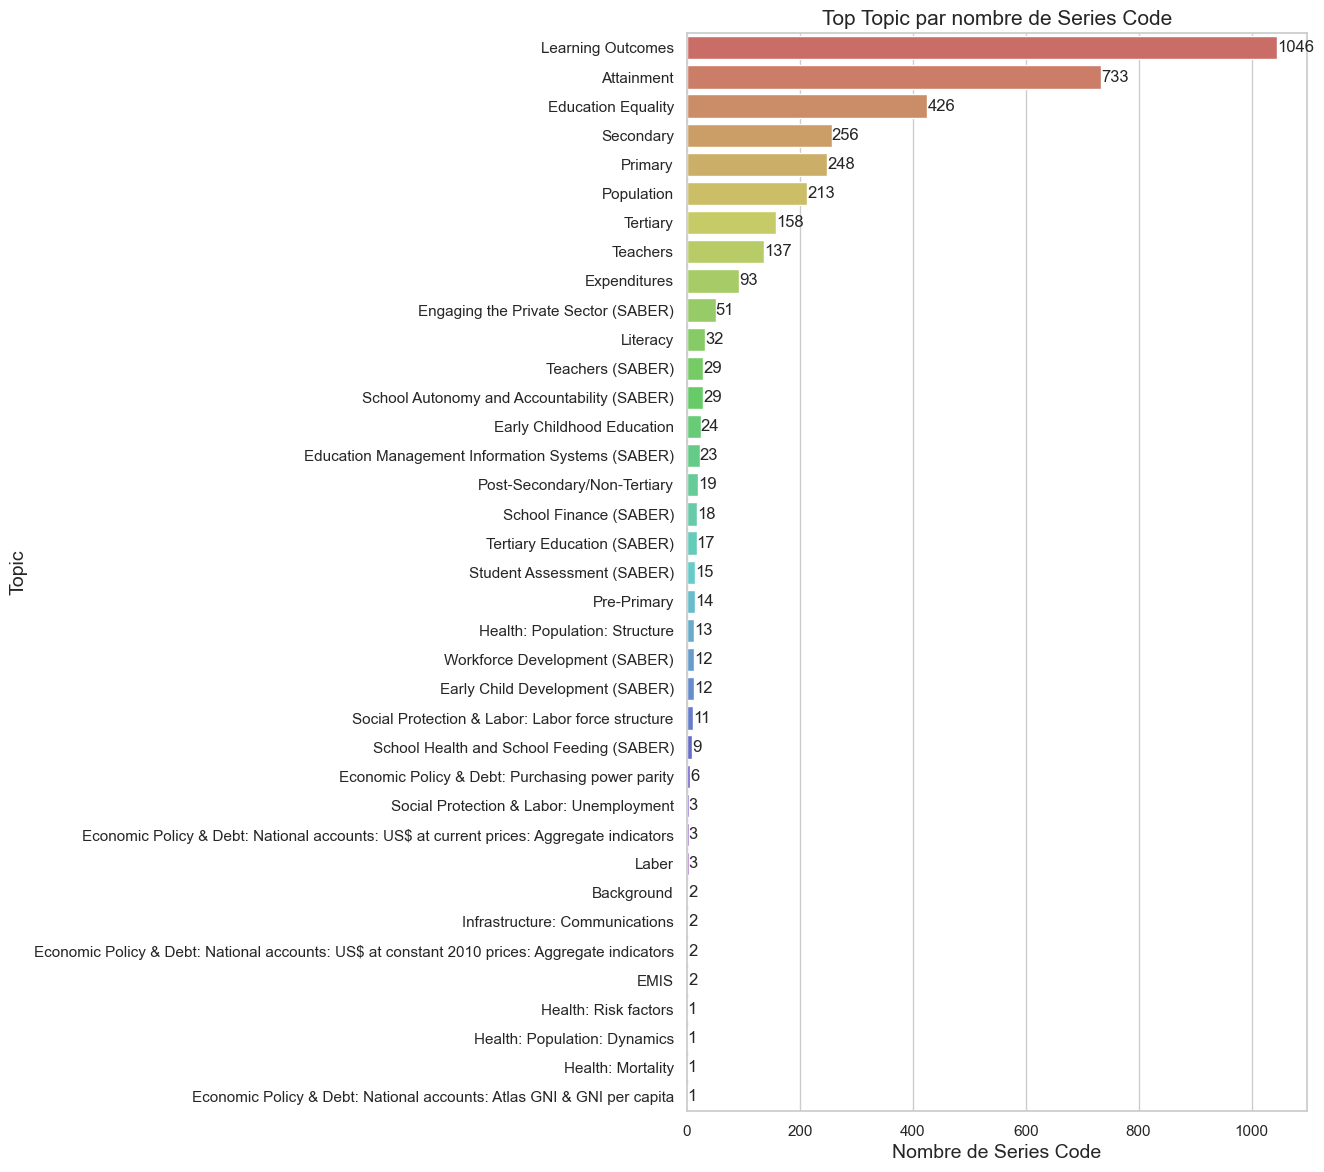

In [58]:
#Regardons le nombre de SeriesCode par Topic
plt.figure(figsize=(8,14))
nb_Topic=Df_Series.groupby(Df_Series["Topic"])["Series Code"].count().reset_index().sort_values(by="Series Code", ascending=False)
barplot=sns.barplot(x=nb_Topic["Series Code"], y=nb_Topic["Topic"],palette="hls");
plt.xlabel("Nombre de Series Code", fontsize=14)
plt.ylabel("Topic", fontsize=14)
plt.title("Top Topic par nombre de Series Code", fontsize=15);
barplot.bar_label(barplot.containers[0]);

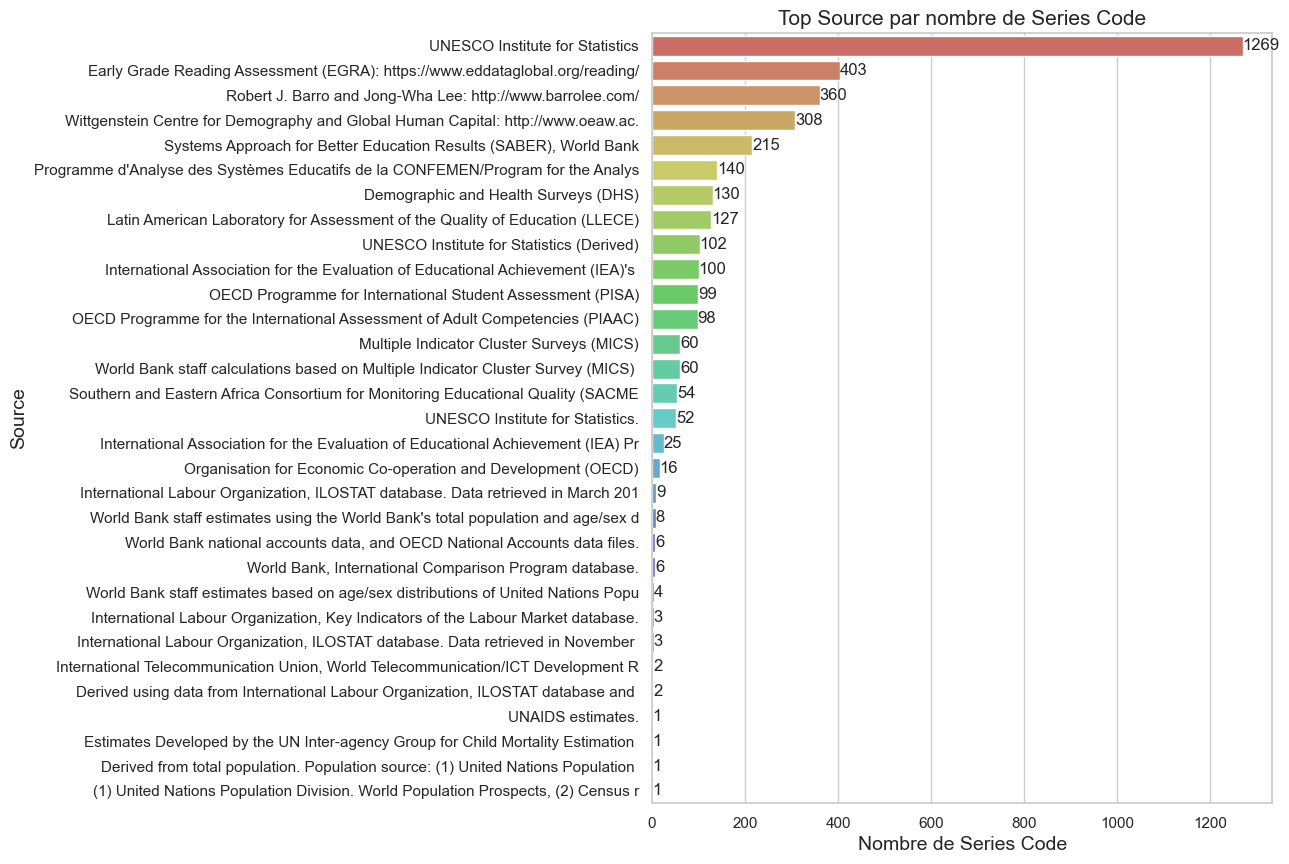

In [59]:
#Regardons le nombre de SeriesCode par Source
plt.figure(figsize=(8,10))
nb_Topic=Df_Series.groupby(Df_Series["Source"])["Series Code"].count().reset_index().sort_values(by="Series Code", ascending=False)
nb_Topic["Source"] = nb_Topic["Source"].str[:80]
barplot=sns.barplot(x=nb_Topic["Series Code"], y=nb_Topic["Source"],palette="hls");
plt.xlabel("Nombre de Series Code", fontsize=14)
plt.ylabel("Source", fontsize=14)
plt.title("Top Source par nombre de Series Code", fontsize=15);
barplot.bar_label(barplot.containers[0]);

# 3. Réduction du dataset <a class="anchor" id="chapter3"></a>

## 3.1 Créations des 2 data-frames de travail <a class="anchor" id="section_3_1"></a>

Commençons par créer deux data frame, l'un sera une combinaison des fichiers Country et Data pour les pays et l'autre pour les groupements de pays, ainsi pour la selection des indicateurs nous ne serons pas influencé par les groupements de pays et nous pourrons tout de même analyser ceux-ci sur les différents indicateurs choisis

In [60]:
#Ne gardons que les colonnes intéressante de ce fichier à savoir : Country Code, Region, Income Group 
Df_country=Df_country[["Country Code","Region","Income Group"]]
Df_country.head(3)

Country Code                     Region          Income Group
0          ABW  Latin America & Caribbean  High income: nonOECD
1          AFG                 South Asia            Low income
2          AGO         Sub-Saharan Africa   Upper middle income

In [61]:
Df_Data.pop("Unnamed: 69")
Df_Data.head(3)

Country Name Country Code  \
0   Arab World          ARB   
1   Arab World          ARB   
2   Arab World          ARB   

                                      Indicator Name  Indicator Code  1970  \
0  Adjusted net enrolment rate, lower secondary, ...      UIS.NERA.2   NaN   
1  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.F   NaN   
2  Adjusted net enrolment rate, lower secondary, ...  UIS.NERA.2.GPI   NaN   

   1971  1972  1973  1974  1975  1976  1977  1978  1979  1980  1981  1982  \
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   1983  1984  1985  1986  1987  1988  1989  1990  1991  1992  1993  1994  \
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   1995  1996  1997  1998  1999  2000  2001  2002  2003  2004  2005  2006  \
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   2007  2008  2009  2010  2011  2012  2013  2014  2015  2016  2017  2020  \
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   2025  2030  2035  2040  2045  2050  2055  2060  2065  2070  2075  2080  \
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   2085  2090  2095  2100  
0   NaN   NaN   NaN   NaN  
1   NaN   NaN   NaN   NaN  
2   NaN   NaN   NaN   NaN

In [62]:
List_groupe=Df_country.loc[Df_country["Region"]=="Non Renseigné"]["Country Code"].values.tolist()

In [63]:
#Deux pays sont présents dans cettte liste : Gibraltar et Nauru, retirons-les
List_groupe.remove("GIB")
List_groupe.remove("NRU")

In [64]:
#Récupérons maintenant un data-frame avec les données des groupes de pays
Df_groupe=Df_Data.loc[Df_Data["Country Code"].isin(List_groupe)]

In [65]:
# Puis le data-frame pour les pays :
Df_pays=Df_Data.loc[~Df_Data["Country Code"].isin(List_groupe)]
Df_pays=Df_pays.merge(Df_country,on="Country Code")

## 3.2 Réduction via la variable Income Group <a class="anchor" id="section_3_2"></a>

Rappel sur les caractéristiques importantes pour déterminer nos indicateurs :
    - Cible : lycéen et étudiants -> population cible la plus importante possible donc population de base du pays au delà d'un certain seuil
    - Support : formation en ligne donc connexion internet nécessaire
    - Coût : les pays selectionnés doivent avoir une population avec suffisamment de moyen financier pour souscrire aux formations
Nous pouvons déjà retirer les pays qui n'appartiennent pas à l'Income Group de la France ou à celui juste en dessous, en considérant que les habitants n'auront pas les moyens pour souscrire au formations.

In [66]:
Df_pays=Df_pays.loc[Df_pays["Income Group"].isin(["High income: nonOECD","High income: OECD","Upper-middle-income"])]

## 3.3 Réduction via la population 15/24 ans <a class="anchor" id="section_3_3"></a>

In [67]:
# Filtrons les pays en se basant sur la population totale de ceux-ci, un pays dont la population d'individus entre 15 et 24 ans est trop faible 
#Pour nous donner un ordre de grandeur regardons cet indicateur pour la France ainsi que pour l'ensemble des pays restant
print(Df_pays.loc[(Df_pays["Indicator Code"]=="SP.POP.1524.TO.UN") & (Df_pays["Country Code"]=="FRA")])

       Country Name Country Code                 Indicator Name  \
244372       France          FRA  Population, ages 15-24, total   

           Indicator Code  1970  1971  1972  1973  1974  1975  1976  1977  \
244372  SP.POP.1524.TO.UN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

        1978  1979  1980  1981  1982  1983  1984  1985  1986  1987  1988  \
244372   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

        1989       1990       1991       1992       1993       1994  \
244372   NaN  8516730.0  8429131.0  8313465.0  8182590.0  8054577.0   

             1995       1996       1997       1998       1999       2000  \
244372  7943067.0  7850995.0  7776167.0  7720623.0  7685310.0  7669903.0   

             2001       2002       2003       2004       2005       2006  \
244372  7677498.0  7706168.0  7744162.0  7775493.0  7788836.0  7780124.0   

             2007       2008       2009       2010       2011       2012  \
244372  7753063.0  7713805.0  76

In [68]:
print(Df_pays.loc[(Df_pays["Indicator Code"]=="SP.POP.1524.TO.UN") & (Df_pays["2015"].isnull())]["Country Code"])

#Il ne s'agit que de petit pays ou territoire autonome qui sont trop petit pour être des cibles prioritaires d'expansion

17142     AND
24472     ATG
79447     BMU
130757    CYM
141752    CHI
182067    CUW
233377    FRO
248037    PYF
277357    GRL
284687    GUM
339662    IMN
412962    LIE
475267    MCO
511917    NCL
530242    MNP
574222    PRI
596212    SMR
625532    SXM
658517    KNA
665847    MAF
731817    TCA
775797    VIR
Name: Country Code, dtype: object


In [69]:
#Fixons le seuil à 500 000 personnes entre 15 et 24 ans, ce qui permettra de réduire la liste des pays potentiel pour l'expansion
List_pays=Df_pays.loc[(Df_pays["Indicator Code"]=="SP.POP.1524.TO.UN") & (Df_pays["2015"]>500000)]["Country Code"]
Df_pays=Df_pays.loc[Df_pays["Country Code"].isin(List_pays)].reset_index().drop(columns="index")

## 3.4 Réduction via le taux de remplissage par année <a class="anchor" id="section_3_4"></a>

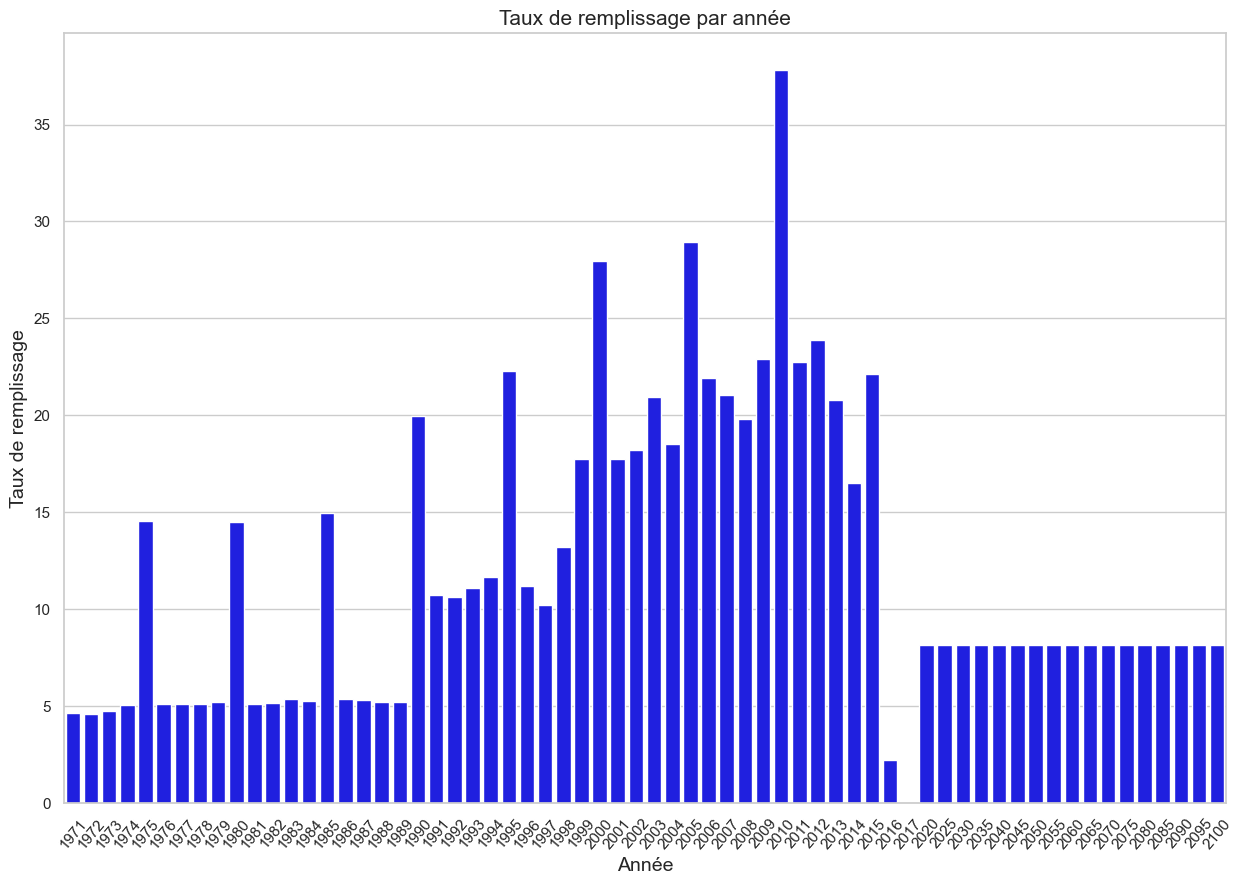

In [70]:
#Pour determiner quelles annés seront utilisées pour la suite de l'étude, retraçons le taux de remplissage par année mais uniquement pour les pays restants.
plt.figure(figsize=(15,10))
Pays_plot=Df_pays.iloc[:,5:-2].notna().mean()*100
Pays_plot=Pays_plot.reset_index()
Pays_plot.rename(columns={"index":"Année",0:"Taux remplissage"},inplace=True)
barplot=sns.barplot(data=Pays_plot,x=Pays_plot["Année"],y=Pays_plot["Taux remplissage"],color="blue")
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=50)
plt.xlabel("Année", fontsize=14)
plt.ylabel("Taux de remplissage", fontsize=14)
plt.title("Taux de remplissage par année", fontsize=15);

In [71]:
#Nous nous limiterons aux années 2005 à 2015 pour la déterminations des différents indicateurs, les années de prévisions (à partir de 2020 serons aussi étudiés plus tard)
#retirons donc les années en dehors de cette fourchette, même chose pour le data-frame des groupements


def check_even(column):
    if len(column)== 4:
          return True  

    return False

Years = list(filter(check_even, Df_pays.columns.values))

Years_drop = [year for year in Years if int(year) < 2005 or int(year) > 2015]

Df_pays = Df_pays.drop(columns=Years_drop)
Df_groupe =Df_groupe.drop(columns=Years_drop)

## 3.5 Réduction via le taux de remplissage des indicateurs <a class="anchor" id="section_3_5"></a>

In [72]:
#Eliminons maintenant les indicateurs qui ne sont pas suffisamment remplis sur les années 2005-2015 pour être utilisés
Remplissage_indic=(Df_pays.drop(columns=["Country Name","Country Code","Indicator Code","Region","Income Group"]).groupby("Indicator Name").count().sum(axis=1)*100/(11*35)).sort_values(ascending=False)

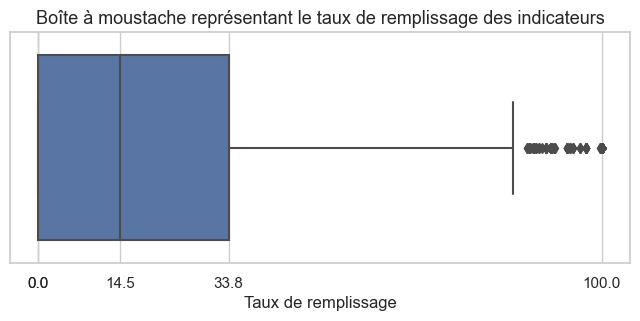

In [73]:
#plt.boxplot(Remplissage_indic,showfliers=False,vert=False);
quantiles = np.quantile(Remplissage_indic, np.array([0.00, 0.25, 0.50, 0.75, 1.00]))
plt.figure(figsize=(8,3))
boxplot= sns.boxplot(x=Remplissage_indic)
boxplot.set_xticks(quantiles)
plt.title("Boîte à moustache représentant le taux de remplissage des indicateurs", fontsize=13)
plt.xlabel("Taux de remplissage", fontsize=12);

On remarque que 25% des indicateurs ont un taux de remplissage supérieur à 33,8%, nous ne conserverons que les indicateurs dont le taux de remplissage est supérieur à 75%

In [74]:
List_indicator_Name=Remplissage_indic.loc[Remplissage_indic>75].index
List_indicator_Name

Index(['Population, ages 11-16, total', 'Population, ages 10-17, female',
       'Population, ages 12-15, male', 'Population, ages 12-15, female',
       'Population, ages 11-18, total', 'Population, ages 11-18, male',
       'Population, ages 11-18, female', 'Population, ages 11-17, total',
       'Population, ages 11-17, male', 'Population, ages 11-17, female',
       ...
       'Theoretical duration of post-secondary non-tertiary education (years)',
       'Percentage of male students in upper secondary education enrolled in vocational programmes, male (%)',
       'Graduates from tertiary education, both sexes (number)',
       'Enrolment in pre-primary education, female (number)',
       'Percentage of students in pre-primary education who are female (%)',
       'Percentage of enrolment in pre-primary education in private institutions (%)',
       'Rate of out-of-school children of primary school age, both sexes (%)',
       'Net enrolment rate, primary, both sexes (%)',
       '

In [75]:
Df_pays=Df_pays.loc[Df_pays["Indicator Name"].isin(List_indicator_Name)]
Df_groupe=Df_groupe.loc[Df_groupe["Indicator Name"].isin(List_indicator_Name)]

## 3.6 Selection des indicateurs pertinents <a class="anchor" id="section_3_6"></a>

Pour selectionner les indicateurs, nous allons utiliser le fichier EdStatsSeries afin d'accéder aux définitions des différents indicateurs, nous réaliserons plusieurs recherche par mots-clés sur la liste de nos indicateurs conservés. Nous garderons l'indicateur SP.POP.1524.TO.UN utilisé précedemment. Celui-ci caractérise la taille de la population cible.

In [76]:
Del_column_series=Df_Series.columns.values[5:]
Df_Series=Df_Series.drop(columns=Del_column_series).drop(columns=["Short definition"])
Df_Series=Df_Series.loc[Df_Series["Indicator Name"].isin(List_indicator_Name)]                                                    

In [77]:
# Définissons une fonction pour effectuer une recherche par mots-clés
def recherche_mc(mot):
    return Df_Series.loc[Df_Series["Indicator Name"].isin([indic for indic in List_indicator_Name if (mot) in indic])]

In [78]:
# Effectuons une première recherche sur les indicateurs liés à une population :
recherche_mc("Pop")

Series Code                          Topic  \
2405    SP.POP.0305.FE.UN                     Population   
2406    SP.POP.0305.MA.UN                     Population   
2407    SP.POP.0305.TO.UN                     Population   
2408    SP.POP.0406.FE.UN                     Population   
2409    SP.POP.0406.MA.UN                     Population   
2410    SP.POP.0406.TO.UN                     Population   
2411    SP.POP.0509.FE.UN                     Population   
2412    SP.POP.0509.MA.UN                     Population   
2413    SP.POP.0509.TO.UN                     Population   
2414    SP.POP.0510.FE.UN                     Population   
2415    SP.POP.0510.MA.UN                     Population   
2416    SP.POP.0510.TO.UN                     Population   
2417    SP.POP.0511.FE.UN                     Population   
2418    SP.POP.0511.MA.UN                     Population   
2419    SP.POP.0511.TO.UN                     Population   
2420    SP.POP.0609.FE.UN                     Population   
2421    SP.POP.0609.MA.UN                     Population   
2422    SP.POP.0609.TO.UN                     Population   
2423    SP.POP.0610.FE.UN                     Population   
2424    SP.POP.0610.MA.UN                     Population   
2425    SP.POP.0610.TO.UN                     Population   
2426    SP.POP.0611.FE.UN                     Population   
2427    SP.POP.0611.MA.UN                     Population   
2428    SP.POP.0611.TO.UN                     Population   
2429    SP.POP.0612.FE.UN                     Population   
2430    SP.POP.0612.MA.UN                     Population   
2431    SP.POP.0612.TO.UN                     Population   
2432    SP.POP.0709.FE.UN                     Population   
2433    SP.POP.0709.MA.UN                     Population   
2434    SP.POP.0709.TO.UN                     Population   
2435    SP.POP.0710.FE.UN                     Population   
2436    SP.POP.0710.MA.UN                     Population   
2437    SP.POP.0710.TO.UN                     Population   
2438    SP.POP.0711.FE.UN                     Population   
2439    SP.POP.0711.MA.UN                     Population   
2440    SP.POP.0711.TO.UN                     Population   
2441    SP.POP.0712.FE.UN                     Population   
2442    SP.POP.0712.MA.UN                     Population   
2443    SP.POP.0712.TO.UN                     Population   
2444    SP.POP.0713.FE.UN                     Population   
2445    SP.POP.0713.MA.UN                     Population   
2446    SP.POP.0713.TO.UN                     Population   
2447    SP.POP.1014.FE.UN                     Population   
2448    SP.POP.1014.MA.UN                     Population   
2449    SP.POP.1014.TO.UN                     Population   
2450    SP.POP.1015.FE.UN                     Population   
2451    SP.POP.1015.MA.UN                     Population   
2452    SP.POP.1015.TO.UN                     Population   
2453    SP.POP.1016.FE.UN                     Population   
2454    SP.POP.1016.MA.UN                     Population   
2455    SP.POP.1016.TO.UN                     Population   
2456    SP.POP.1017.FE.UN                     Population   
2457    SP.POP.1017.MA.UN                     Population   
2458    SP.POP.1017.TO.UN                     Population   
2459    SP.POP.1018.FE.UN                     Population   
2460    SP.POP.1018.MA.UN                     Population   
2461    SP.POP.1018.TO.UN                     Population   
2462    SP.POP.1115.FE.UN                     Population   
2463    SP.POP.1115.MA.UN                     Population   
2464    SP.POP.1115.TO.UN                     Population   
2465    SP.POP.1116.FE.UN                     Population   
2466    SP.POP.1116.MA.UN                     Population   
2467    SP.POP.1116.TO.UN                     Population   
2468    SP.POP.1117.FE.UN                     Population   
2469    SP.POP.1117.MA.UN                     Population   
2470    SP.POP.1117.TO.UN                     Populati

In [79]:
#Nous ne garderons que l'indicateur Population, ages 15-24, total
List_indicator_final=[]
List_indicator_final.append("Population, ages 15-24, total")

In [80]:
#Effectuons une recherche sur les indicateurs liés à un taux :
recherche_mc("rate")
#Aucun indicateur pertinent ici

Series Code    Topic                                     Indicator Name  \
2256  SE.PRM.NENR  Primary        Net enrolment rate, primary, both sexes (%)   
2278  SE.PRM.TENR  Primary  Adjusted net enrolment rate, primary, both sex...   

                                        Long definition  
2256  Total number of students in the theoretical ag...  
2278  Total number of students of the official prima...

In [81]:
#Effectuons une recherche sur les indicateurs liés à un rapport :
recherche_mc("ratio")

Series Code        Topic  \
2216         SE.COM.DURS   Background   
2217   SE.ENR.PRIM.FM.ZS      Primary   
2218   SE.ENR.PRSC.FM.ZS    Secondary   
2219   SE.ENR.SECO.FM.ZS    Secondary   
2220   SE.ENR.TERT.FM.ZS     Tertiary   
2225         SE.PRE.ENRR  Pre-Primary   
2245         SE.PRM.DURS      Primary   
2250         SE.PRM.ENRR      Primary   
2251      SE.PRM.ENRR.FE      Primary   
2252      SE.PRM.ENRR.MA      Primary   
2291         SE.SEC.DURS    Secondary   
2292     SE.SEC.DURS.LO     Secondary   
2293      SE.SEC.DURS.UP    Secondary   
2307         SE.SEC.ENRR    Secondary   
2308      SE.SEC.ENRR.FE    Secondary   
2309      SE.SEC.ENRR.LO    Secondary   
2310   SE.SEC.ENRR.LO.FE    Secondary   
2311   SE.SEC.ENRR.LO.MA    Secondary   
2312      SE.SEC.ENRR.MA    Secondary   
2313      SE.SEC.ENRR.UP    Secondary   
2314  SE.SEC.ENRR.UP.FE     Secondary   
2315   SE.SEC.ENRR.UP.MA    Secondary   
2335         SE.TER.ENRR     Tertiary   
2336      SE.TER.ENRR.FE     Tertiary   
2337      SE.TER.ENRR.MA     Tertiary   
2372         SE.TOT.ENRR     Tertiary   
3004          UIS.GER.12    Secondary   
3005        UIS.GER.12.F    Secondary   
3006      UIS.GER.12.GPI    Secondary   
3007        UIS.GER.12.M    Secondary   
3008         UIS.GER.123    Secondary   
3009       UIS.GER.123.F    Secondary   
3010       UIS.GER.123.M    Secondary   
3014       UIS.GER.2.GPI    Secondary   
3015       UIS.GER.3.GPI    Secondary   
3551         UIS.thDur.0  Pre-Primary   
3552   UIS.thDur.4.A.GPV     Tertiary   

                                         Indicator Name  \
2216           Duration of compulsory education (years)   
2217  Gross enrolment ratio, primary, gender parity ...   
2218  Gross enrolment ratio, primary and secondary, ...   
2219  Gross enrolment ratio, secondary, gender parit...   
2220  Gross enrolment ratio, tertiary, gender parity...   
2225  Gross enrolment ratio, pre-primary, both sexes...   
2245  Theoretical duration of primary education (years)   
2250     Gross enrolment ratio, primary, both sexes (%)   
2251         Gross enrolment ratio, primary, female (%)   
2252           Gross enrolment ratio, primary, male (%)   
2291  Theoretical duration of secondary education (y...   
2292  Theoretical duration of lower secondary educat...   
2293  Theoretical duration of upper secondary educat...   
2307   Gross enrolment ratio, secondary, both sexes (%)   
2308       Gross enrolment ratio, secondary, female (%)   
2309  Gross enrolment ratio, lower secondary, both s...   
2310  Gross enrolment ratio, lower secondary, female...   
2311   Gross enrolment ratio, lower secondary, male (%)   
2312         Gross enrolment ratio, secondary, male (%)   
2313  Gross enrolment ratio, upper secondary, both s...   
2314  Gross enrolment ratio, upper secondary, female...   
2315   Gross enrolment ratio, upper secondary, male (%)   
2335    Gross enrolment ratio, tertiary, both sexes (%)   
2336        Gross enrolment ratio, tertiary, female (%)   
2337          Gross enrolment ratio, tertiary, male (%)   
2372  Gross enrolment ratio, primary to tertiary, bo...   
3004  Gross enrolment ratio, primary and lower secon...   
3005  Gross enrolment ratio, primary and lower secon...   
3006  Gross enrolment ratio, primary and lower secon...   
3007  Gross enrolment ratio, primary and lower secon...   
3008  Gross enrolment ratio, primary and secondary, ...   
3009  Gross enrolment ratio, primary and secondary, ...   
3010  Gross enrolment ratio, primary and secondary, ...   
3014  Gross enrolment ratio, lower secondary, gender...   
3015  Gross enrolment ratio, upper secondary, gender...   
3551  Theoretical duration of pre-primary education ...   
3552  Theoretical duration of post-secondary non-ter...   

                                        Long definition  
2216  Number of years that children are legally obli...  
2217  Ratio of female gross enrolment ratio for prim...  
2218  Ratio of female gross enrolment

In [82]:
#Nous garderons l'indicateur Gross enrolment ratio, secondary, both sexes (%) et son équivalent pour le tertiaire : Gross enrolment ratio, tertiary, both sexes (%)	
List_indicator_final.append("Gross enrolment ratio, secondary, both sexes (%)")
List_indicator_final.append("Gross enrolment ratio, tertiary, both sexes (%)")

In [83]:
#Effectuons une recherche sur les indicateurs liés à une connexion internet :
recherche_mc("net")

Series Code                           Topic  \
611   IT.NET.USER.P2  Infrastructure: Communications   
2278     SE.PRM.TENR                         Primary   

                                         Indicator Name  \
611                     Internet users (per 100 people)   
2278  Adjusted net enrolment rate, primary, both sex...   

                                        Long definition  
611   Internet users are individuals who have used t...  
2278  Total number of students of the official prima...

In [84]:
#Nous garderons l'indicateur Internet users (per 100 people)
List_indicator_final.append("Internet users (per 100 people)")

In [85]:
#Effectuons une recherche sur les indicateurs liés aux données économiques:
recherche_mc("GNI")

Series Code                                              Topic  \
1666     NY.GNP.MKTP.CD  Economic Policy & Debt: National accounts: US$...   
1667  NY.GNP.MKTP.PP.CD    Economic Policy & Debt: Purchasing power parity   
1668     NY.GNP.PCAP.CD  Economic Policy & Debt: National accounts: Atl...   
1669  NY.GNP.PCAP.PP.CD    Economic Policy & Debt: Purchasing power parity   

                                     Indicator Name  \
1666                              GNI (current US$)   
1667             GNI, PPP (current international $)   
1668     GNI per capita, Atlas method (current US$)   
1669  GNI per capita, PPP (current international $)   

                                        Long definition  
1666  GNI (formerly GNP) is the sum of value added b...  
1667  PPP GNI (formerly PPP GNP) is gross national i...  
1668  GNI per capita (formerly GNP per capita) is th...  
1669  GNI per capita based on purchasing power parit...

In [86]:
#Nous garderons l'indicateur GNI per capita, PPP (current international $) qui rend compte au mieux du niveau de vie par habitant dans un pays donné
List_indicator_final.append("GNI per capita, PPP (current international $)")

In [87]:
#Réduisons nos 2 data-frame en ne conservons que les indicateurs retenus
Df_pays=Df_pays.loc[Df_pays["Indicator Name"].isin(List_indicator_final)].reset_index().drop(columns="index")
Df_groupe=Df_groupe.loc[Df_groupe["Indicator Name"].isin(List_indicator_final)].reset_index().drop(columns="index")

## 3.7 Traitement des valeurs manquantes <a class="anchor" id="section_3_7"></a>

In [88]:
Df_pays[Df_pays.isnull().any(axis=1)]

Country Name Country Code  \
1               Australia          AUS   
2               Australia          AUS   
16                 Canada          CAN   
17                 Canada          CAN   
46                 France          FRA   
47                 France          FRA   
52                Germany          DEU   
56                 Greece          GRC   
57                 Greece          GRC   
66                Ireland          IRL   
72                 Israel          ISR   
81                  Japan          JPN   
82                  Japan          JPN   
92            Netherlands          NLD   
106                  Oman          OMN   
107                  Oman          OMN   
111                Poland          POL   
112                Poland          POL   
121    Russian Federation          RUS   
122    Russian Federation          RUS   
126          Saudi Arabia          SAU   
131             Singapore          SGP   
132             Singapore          SGP   
137       Slovak Republic          SVK   
156  United Arab Emirates          ARE   
157  United Arab Emirates          ARE   
161        United Kingdom          GBR   
162        United Kingdom          GBR   
166         United States          USA   
171               Uruguay          URY   
172               Uruguay          URY   

                                       Indicator Name Indicator Code  \
1    Gross enrolment ratio, secondary, both sexes (%)    SE.SEC.ENRR   
2     Gross enrolment ratio, tertiary, both sexes (%)    SE.TER.ENRR   
16   Gross enrolment ratio, secondary, both sexes (%)    SE.SEC.ENRR   
17    Gross enrolment ratio, tertiary, both sexes (%)    SE.TER.ENRR   
46   Gross enrolment ratio, secondary, both sexes (%)    SE.SEC.ENRR   
47    Gross enrolment ratio, tertiary, both sexes (%)    SE.TER.ENRR   
52    Gross enrolment ratio, tertiary, both sexes (%)    SE.TER.ENRR   
56   Gross enrolment ratio, secondary, both sexes (%)    SE.SEC.ENRR   
57    Gross enrolment ratio, tertiary, both sexes (%)    SE.TER.ENRR   
66   Gross enrolment ratio, secondary, both sexes (%)    SE.SEC.ENRR   
72    Gross enrolment ratio, tertiary, both sexes (%)    SE.TER.ENRR   
81   Gross enrolment ratio, secondary, both sexes (%)    SE.SEC.ENRR   
82    Gross enrolment ratio, tertiary, both sexes (%)    SE.TER.ENRR   
92    Gross enrolment ratio, tertiary, both sexes (%)    SE.TER.ENRR   
106  Gross enrolment ratio, secondary, both sexes (%)    SE.SEC.ENRR   
107   Gross enrolment ratio, tertiary, both sexes (%)    SE.TER.ENRR   
111  Gross enrolment ratio, secondary, both sexes (%)    SE.SEC.ENRR   
112   Gross enrolment ratio, tertiary, both sexes (%)    SE.TER.ENRR   
121  Gross enrolment ratio, secondary, both sexes (%)    SE.SEC.ENRR   
122   Gross enrolment ratio, tertiary, both sexes (%)    SE.TER.ENRR   
126  Gross enrolment ratio, secondary, both sexes (%)    SE.SEC.ENRR   
131  Gross enrolment ratio, secondary, both sexes (%)    SE.SEC.ENRR   
132   Gross enrolment ratio, tertiary, both sexes (%)    SE.TER.ENRR   
137   Gross enrolment ratio, tertiary, both sexes (%)    SE.TER.ENRR   
156  Gross enrolment ratio, secondary, both sexes (%)    SE.SEC.ENRR   
157   Gross enrolment ratio, tertiary, both sexes (%)    SE.TER.ENRR   
161  Gross enrolment ratio, secondary, both sexes (%)    SE.SEC.ENRR   
162   Gross enrolment ratio, tertiary, both sexes (%)    SE.TER.ENRR   
166  Gross enrolment ratio, secondary, both sexes (%)    SE.SEC.ENRR   
171  Gross enrolment ratio, secondary, both sexes (%)    SE.SEC.ENRR   
172   Gross enrolment ratio, tertiary, both sexes (%)    SE.TER.ENRR   

           2005        2006        2007        2008        2009        2010  \
1    148.366104  127.389618  126.366379  128.034058  130.318542  132.456696   
2     72.291924   71.482918   72.519951   72.918541   76.765373   80.917084   
16   101.056847  101.425110  101.677612  102.196854  102.663208  102.397278   
17          NaN         NaN         NaN        

Pour classer les pays nous utiliserons la moyenne des valeurs sur la fourchette d'année choisiE, ainsi cela nous permet de distinguer plusieurs cas de figure :
- présence d'au moins 3 valeurs pour un pays et un indicateur donné -> pas de corrections
- aucune valeur -> corrections

In [89]:
Df_pays
#On observe que les données lié à l'utilisation d'internet on fortement évolué entre 2005 et 2015, pour ne pas fausser notre analyse nous ne garderons que les années 2010 à 2015 désormais.

Country Name Country Code  \
0               Australia          AUS   
1               Australia          AUS   
2               Australia          AUS   
3               Australia          AUS   
4               Australia          AUS   
5                 Austria          AUT   
6                 Austria          AUT   
7                 Austria          AUT   
8                 Austria          AUT   
9                 Austria          AUT   
10                Belgium          BEL   
11                Belgium          BEL   
12                Belgium          BEL   
13                Belgium          BEL   
14                Belgium          BEL   
15                 Canada          CAN   
16                 Canada          CAN   
17                 Canada          CAN   
18                 Canada          CAN   
19                 Canada          CAN   
20                  Chile          CHL   
21                  Chile          CHL   
22                  Chile          CHL   
23                  Chile          CHL   
24                  Chile          CHL   
25                Croatia          HRV   
26                Croatia          HRV   
27                Croatia          HRV   
28                Croatia          HRV   
29                Croatia          HRV   
30         Czech Republic          CZE   
31         Czech Republic          CZE   
32         Czech Republic          CZE   
33         Czech Republic          CZE   
34         Czech Republic          CZE   
35                Denmark          DNK   
36                Denmark          DNK   
37                Denmark          DNK   
38                Denmark          DNK   
39                Denmark          DNK   
40                Finland          FIN   
41                Finland          FIN   
42                Finland          FIN   
43                Finland          FIN   
44                Finland          FIN   
45                 France          FRA   
46                 France          FRA   
47                 France          FRA   
48                 France          FRA   
49                 France          FRA   
50                Germany          DEU   
51                Germany          DEU   
52                Germany          DEU   
53                Germany          DEU   
54                Germany          DEU   
55                 Greece          GRC   
56                 Greece          GRC   
57                 Greece          GRC   
58                 Greece          GRC   
59                 Greece          GRC   
60   Hong Kong SAR, China          HKG   
61   Hong Kong SAR, China          HKG   
62   Hong Kong SAR, China          HKG   
63   Hong Kong SAR, China          HKG   
64   Hong Kong SAR, China          HKG   
65                Ireland          IRL   
66                Ireland          IRL   
67                Ireland          IRL   
68                Ireland          IRL   
69                Ireland          IRL   
70                 Israel          ISR   
71                 Israel          ISR   
72                 Israel          ISR   
73                 Israel          ISR   
74                 Israel          ISR   
75                  Italy          ITA   
76                  Italy          ITA   
77                  Italy          ITA   
78                  Italy          ITA   
79                  Italy          ITA   
80                  Japan          JPN   
81                  Japan          JPN   
82                  Japan          JPN   
83                  Japan          JPN   
84                  Japan          JPN   
85            Korea, Rep.          KOR   
86            Korea, Rep.          KOR   
87            Korea, Rep.          KOR   
88            Korea, Rep.          KOR   
89            Korea, Rep.          KOR   
90            Netherlands          NLD   
91            Netherlands          NLD   
92            Netherlands          NLD   
93            Netherlands          NLD   
94            Netherlan

In [90]:
Years = list(filter(check_even, Df_pays.columns.values))
Years_drop = [year for year in Years if int(year) < 2010 or int(year) > 2015]

Df_pays = Df_pays.drop(columns=Years_drop)
Df_groupe =Df_groupe.drop(columns=Years_drop)

In [91]:
# Recherchons les couples pays-indicateurs consernés :
Couple_non_renseigné=Df_pays[Df_pays["2013"].isnull()].drop(index=[66,92])
Couple_non_renseigné

Country Name Country Code  \
17                 Canada          CAN   
107                  Oman          OMN   
131             Singapore          SGP   
132             Singapore          SGP   
156  United Arab Emirates          ARE   
157  United Arab Emirates          ARE   

                                       Indicator Name Indicator Code  2010  \
17    Gross enrolment ratio, tertiary, both sexes (%)    SE.TER.ENRR   NaN   
107   Gross enrolment ratio, tertiary, both sexes (%)    SE.TER.ENRR   NaN   
131  Gross enrolment ratio, secondary, both sexes (%)    SE.SEC.ENRR   NaN   
132   Gross enrolment ratio, tertiary, both sexes (%)    SE.TER.ENRR   NaN   
156  Gross enrolment ratio, secondary, both sexes (%)    SE.SEC.ENRR   NaN   
157   Gross enrolment ratio, tertiary, both sexes (%)    SE.TER.ENRR   NaN   

     2011  2012  2013  2014  2015                      Region  \
17    NaN   NaN   NaN   NaN   NaN               North America   
107   NaN   NaN   NaN   NaN   NaN  Middle East & North Africa   
131   NaN   NaN   NaN   NaN   NaN         East Asia & Pacific   
132   NaN   NaN   NaN   NaN   NaN         East Asia & Pacific   
156   NaN   NaN   NaN   NaN   NaN  Middle East & North Africa   
157   NaN   NaN   NaN   NaN   NaN  Middle East & North Africa   

             Income Group  
17      High income: OECD  
107  High income: nonOECD  
131  High income: nonOECD  
132  High income: nonOECD  
156  High income: nonOECD  
157  High income: nonOECD

In [92]:
# Oman, Singapore et United Arab Emirates ont une population de 15-24 ans faible comparé aux autres pays de la selection, il est donc possible de les retirer du data-frame
Index_pays_retirer=Df_pays.loc[Df_pays["Country Code"].isin(["SGP","OMN","ARE"])].index
Df_pays=Df_pays.drop(index=Index_pays_retirer)
#Le Canada ne peut être retirer car il présente une population cible potentiellement importante

In [93]:
#Regardons plus en détail le cas du Canada maintenant et voyons si il n'y a pas des données en dehors de notre plage d'étude
print(Df_Data.loc[(Df_Data["Indicator Code"]=="SE.TOT.ENRR") & (Df_Data["Country Code"]=="CAN")])
#Pas de données exploitable

       Country Name Country Code  \
221227       Canada          CAN   

                                           Indicator Name Indicator Code  \
221227  Gross enrolment ratio, primary to tertiary, bo...    SE.TOT.ENRR   

        1970  1971  1972  1973  1974  1975       1976  1977  1978  1979  1980  \
221227   NaN   NaN   NaN   NaN   NaN   NaN  80.328339   NaN   NaN   NaN   NaN   

        1981  1982  1983  1984  1985       1986  1987  1988       1989  \
221227   NaN   NaN   NaN   NaN   NaN  90.521202   NaN   NaN  95.507469   

             1990       1991        1992       1993       1994       1995  \
221227  97.977379  100.15892  100.980362  98.502281  99.216492  99.131317   

             1996  1997       1998       1999       2000  2001  2002  2003  \
221227  99.230797   NaN  94.723297  93.760719  93.034897   NaN   NaN   NaN   

        2004  2005  2006  2007  2008  2009  2010  2011  2012  2013  2014  \
221227   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

In [94]:
Df_pays.loc[Df_pays["Country Code"]=="CAN"]

Country Name Country Code  \
15       Canada          CAN   
16       Canada          CAN   
17       Canada          CAN   
18       Canada          CAN   
19       Canada          CAN   

                                      Indicator Name     Indicator Code  \
15     GNI per capita, PPP (current international $)  NY.GNP.PCAP.PP.CD   
16  Gross enrolment ratio, secondary, both sexes (%)        SE.SEC.ENRR   
17   Gross enrolment ratio, tertiary, both sexes (%)        SE.TER.ENRR   
18                   Internet users (per 100 people)     IT.NET.USER.P2   
19                     Population, ages 15-24, total  SP.POP.1524.TO.UN   

            2010          2011          2012          2013        2014  \
15  3.923000e+04  4.078000e+04  4.140000e+04  4.342000e+04    44340.00   
16  1.023973e+02  1.034113e+02  1.102676e+02  1.099315e+02         NaN   
17           NaN           NaN           NaN           NaN         NaN   
18  8.030000e+01  8.300000e+01  8.300000e+01  8.580000e+01       87.12   
19  4.497200e+06  4.494958e+06  4.479644e+06  4.452709e+06  4416539.00   

          2015         Region       Income Group  
15    43530.00  North America  High income: OECD  
16         NaN  North America  High income: OECD  
17         NaN  North America  High income: OECD  
18       88.47  North America  High income: OECD  
19  4373511.00  North America  High income: OECD

Le Canada appartient au groupe North America et High income, nous prendrons donc la moyenne des valeurs de ces deux groupes pour determiner la valeur de la variable Gross enrolment ratio, tertiary, both sexes (%) pour le Canada.

Avant de déterminer la valeur manquante pour le Canada nous devons donner la forme finale à nos 2 data-frames et faire en sorte de ne conserver qu'une valeur par pays ou groupe pour chaque indicateur. Retirons les colonnes Country Code,Indicator Name, Region et Income Group

In [95]:
Df_pays=Df_pays.drop(columns=["Country Code", "Indicator Name", "Region", "Income Group"])
#création du data-frame pour les estimations futurs
Df_futur=Df_pays
Df_groupe=Df_groupe.drop(columns=["Country Code", "Indicator Name"])

In [96]:
#Nous allons créer une nouvelle colonne valeur qui sera la moyenne des années 2010 à 2015 pour chaque indicateur et chaque pays
Df_groupe["Valeur"]=Df_groupe[["2010","2011","2012","2013","2014","2015"]].mean(axis=1)
Df_groupe=Df_groupe.drop(columns=["2010","2011","2012","2013","2014","2015"])

Df_pays["Valeur"]=Df_pays[["2010","2011","2012","2013","2014","2015"]].mean(axis=1)
Df_pays=Df_pays.drop(columns=["2010","2011","2012","2013","2014","2015"])

In [97]:
#donnons une nouvelle forme à nos data-frame
Df_groupe= Df_groupe.pivot_table(index="Country Name",columns="Indicator Code")["Valeur"]
Df_pays= Df_pays.pivot_table(index="Country Name",columns="Indicator Code")["Valeur"]

In [98]:
#Déterminons et ajoutons la valeur de l'indicateur SE.TER.ENRR pour le Canada
Df_pays.loc["Canada","SE.TER.ENRR"]=((Df_groupe.loc["High income","SE.TER.ENRR"]+Df_groupe.loc["North America","SE.TER.ENRR"])/2)

In [99]:
#Renommons les indicateurs (colonnes) pour qu'ils soient plus clairs
Df_pays=Df_pays.rename(columns={"IT.NET.USER.P2": "Utilisateurs d'internet", "NY.GNP.PCAP.PP.CD": "Revenu par habitant, PPP", "SE.SEC.ENRR": "Taux de scolarisation au lycée", "SE.TER.ENRR": "Taux de scolarisation ENS","SP.POP.1524.TO.UN": "Population 15-24 ans"})
Df_groupe=Df_groupe.rename(columns={"IT.NET.USER.P2": "Utilisateurs d'internet", "NY.GNP.PCAP.PP.CD": "Revenu par habitant, PPP", "SE.SEC.ENRR": "Taux de scolarisation au lycée", "SE.TER.ENRR": "Taux de scolarisation ENS"});

## 3.8 Scaling <a class="anchor" id="section_3_8"></a>

Le score sera calculer par multiplication des différents indicateurs, pour que ceux-ci est le même poids nous allons les scaler entre [0,1]  via la méthode min-max normalization. Nos valeurs max et min peuvent être dans l'un ou l'autre des datasets, créeons notre propre fonction.
L'indicateur "Population 15-24 ans" n'est pas scaler car cela représente la taille de la population est l'indicateur le plus important.

In [101]:
Df_pays

Indicator Code        Utilisateurs d'internet  Revenu par habitant, PPP  \
Country Name                                                              
Australia                           81.083619              42391.666667   
Austria                             79.915792              46730.000000   
Belgium                             81.592181              43546.666667   
Canada                              84.615000              42116.666667   
Chile                               55.949768              20608.333333   
Croatia                             63.566775              20756.666667   
Czech Republic                      72.791826              28303.333333   
Denmark                             92.956704              47220.000000   
Finland                             88.324486              41163.333333   
France                              81.150716              39316.666667   
Germany                             83.928300              45306.666667   
Greece                              56.838548              26253.333333   
Hong Kong SAR, China                76.019104              53480.000000   
Ireland                             76.620011              41680.000000   
Israel                              71.632339              32280.000000   
Italy                               56.023249              36170.000000   
Japan                               84.190801              39033.333333   
Korea, Rep.                         85.584096              32560.000000   
Netherlands                         92.057865              47921.666667   
New Zealand                         83.306226              33265.000000   
Norway                              94.948943              64683.333333   
Poland                              64.004366              23391.666667   
Portugal                            60.701416              27210.000000   
Russian Federation                  61.283333              23336.666667   
Saudi Arabia                        56.221649              51141.666667   
Slovak Republic                     77.059548              26843.333333   
Spain                               71.535767              32595.000000   
Sweden                              92.310629              46026.666667   
Switzerland                         85.918681              59733.333333   
United Kingdom                      88.552399              38446.666667   
United States                       72.512277              53416.666667   
Uruguay                             56.001405              18616.666667   

Indicator Code        Taux de scolarisation au lycée  \
Country Name                                           
Australia                                 135.750146   
Austria                                    98.849112   
Belgium                                   135.549616   
Canada                                    106.501940   
Chile                                      96.889356   
Croatia                                    99.611607   
Czech Republic                            100.493905   
Denmark                                   126.087490   
Finland                                   126.732508   
France                                    111.159859   
Germany                                   103.013976   
Greece                                    105.569283   
Hong Kong SAR, China                       97.495953   
Ireland                                   125.266859   
Israel                                    101.782007   
Italy                                     102.413827   
Japan                                     101.769556   
Korea, Rep.                                97.180086   
Netherlands                               130.383497   
New Zealand                               118.006105   
Norway                                    112.588840   
Poland                                    101.594176   
Portugal                                  112.997921   
Russian Federation                         98.421

In [102]:
def scaling(minimum,maximum,data):
    x = (data-minimum)/(maximum-minimum)
    return x 

#Récupérons nos variables min et max pour chaque indicateur

minimum=[min(min(Df_pays["Utilisateurs d'internet"]),min(Df_groupe["Utilisateurs d'internet"])), min(min(Df_pays["Revenu par habitant, PPP"]),min(Df_groupe["Revenu par habitant, PPP"])), min(min(Df_pays["Taux de scolarisation au lycée"]),min(Df_groupe["Taux de scolarisation au lycée"])), min(min(Df_pays["Taux de scolarisation ENS"]),min(Df_groupe["Taux de scolarisation ENS"]))]
maximum=[max(max(Df_pays["Utilisateurs d'internet"]),max(Df_groupe["Utilisateurs d'internet"])), max(max(Df_pays["Revenu par habitant, PPP"]),max(Df_groupe["Revenu par habitant, PPP"])), max(max(Df_pays["Taux de scolarisation au lycée"]),max(Df_groupe["Taux de scolarisation au lycée"])), max(max(Df_pays["Taux de scolarisation ENS"]),max(Df_groupe["Taux de scolarisation ENS"]))]

In [103]:
i=0
for column in Df_pays.columns.drop("Population 15-24 ans") :
    Df_pays[column]=scaling(minimum[0+i],maximum[0+i],Df_pays[column])
    i=i+1

In [104]:
j=0
for column in Df_groupe.columns :
    Df_groupe[column]=scaling(minimum[0+j],maximum[0+j],Df_groupe[column])
    j=j+1

In [105]:
Df_pays

Indicator Code        Utilisateurs d'internet  Revenu par habitant, PPP  \
Country Name                                                              
Australia                            0.844205                  0.647440   
Austria                              0.831083                  0.716054   
Belgium                              0.849920                  0.665708   
Canada                               0.883885                  0.643091   
Chile                                0.561795                  0.302920   
Croatia                              0.647382                  0.305266   
Czech Republic                       0.751037                  0.424623   
Denmark                              0.977615                  0.723804   
Finland                              0.925566                  0.628013   
France                               0.844959                  0.598807   
Germany                              0.876169                  0.693543   
Greece                               0.571781                  0.392200   
Hong Kong SAR, China                 0.787299                  0.822811   
Ireland                              0.794051                  0.636185   
Israel                               0.738008                  0.487517   
Italy                                0.562620                  0.549040   
Japan                                0.879119                  0.594326   
Korea, Rep.                          0.894774                  0.491945   
Netherlands                          0.967515                  0.734901   
New Zealand                          0.869179                  0.503095   
Norway                               1.000000                  1.000000   
Poland                               0.652298                  0.346941   
Portugal                             0.615186                  0.407331   
Russian Federation                   0.621724                  0.346071   
Saudi Arabia                         0.564850                  0.785828   
Slovak Republic                      0.798990                  0.401532   
Spain                                0.736923                  0.492499   
Sweden                               0.970355                  0.704931   
Switzerland                          0.898534                  0.921712   
United Kingdom                       0.928127                  0.585047   
United States                        0.747896                  0.821809   
Uruguay                              0.562375                  0.271421   

Indicator Code        Taux de scolarisation au lycée  \
Country Name                                           
Australia                                   1.000000   
Austria                                     0.620778   
Belgium                                     0.997939   
Canada                                      0.699424   
Chile                                       0.600638   
Croatia                                     0.628614   
Czech Republic                              0.637681   
Denmark                                     0.900699   
Finland                                     0.907328   
France                                      0.747292   
Germany                                     0.663579   
Greece                                      0.689839   
Hong Kong SAR, China                        0.606872   
Ireland                                     0.892266   
Israel                                      0.650918   
Italy                                       0.657411   
Japan                                       0.650790   
Korea, Rep.                                 0.603626   
Netherlands                                 0.944848   
New Zealand                                 0.817649   
Norway                                      0.761977   
Poland                                      0.648988   
Portugal                                    0.766181   
Russian Federation                          0.616

In [106]:
Df_groupe

Indicator Code                                      Utilisateurs d'internet  \
Country Name                                                                  
Arab World                                                         0.290829   
East Asia & Pacific                                                0.407828   
East Asia & Pacific (excluding high income)                        0.353351   
Euro area                                                          0.773264   
Europe & Central Asia                                              0.653847   
Europe & Central Asia (excluding high income)                      0.486349   
European Union                                                     0.751651   
Heavily indebted poor countries (HIPC)                             0.024460   
High income                                                        0.787000   
Latin America & Caribbean                                          0.432301   
Latin America & Caribbean (excluding high income)                  0.425388   
Least developed countries: UN classification                       0.019575   
Low & middle income                                                0.245741   
Low income                                                         0.000000   
Lower middle income                                                0.134708   
Middle East & North Africa                                         0.314825   
Middle East & North Africa (excluding high income)                 0.257065   
Middle income                                                      0.271944   
North America                                                      0.761396   
OECD members                                                       0.732141   
South Asia                                                         0.090657   
Sub-Saharan Africa                                                 0.066004   
Sub-Saharan Africa (excluding high income)                         0.065963   
Upper middle income                                                0.424821   
World                                                              0.334812   

Indicator Code                                      Revenu par habitant, PPP  \
Country Name                                                                   
Arab World                                                          0.219235   
East Asia & Pacific                                                 0.197638   
East Asia & Pacific (excluding high income)                         0.147861   
Euro area                                                           0.589052   
Europe & Central Asia                                               0.428442   
Europe & Central Asia (excluding high income)                       0.253082   
European Union                                                      0.522086   
Heavily indebted poor countries (HIPC)                              0.007229   
High income                                                         0.657051   
Latin America & Caribbean                                           0.202272   
Latin America & Caribbean (excluding high income)                   0.196706   
Least developed countries: UN classification                        0.012834   
Low & middle income                                                 0.115399   
Low income                                                          0.000000   
Lower middle income                                                 0.066139   
Middle East & North Africa                                          0.254414   
Middle East & North Africa (excluding high income)                  0.162404   
Middle income                                                       0.128330   
North America                                                       0.804019   
OECD members                                                        0.558348   
South Asia                                                          0.053405   
Sub-Saharan Africa        

# 4. Analyse et score  <a class="anchor" id="chapter4"></a>

## 4.1 Analyse des indicateurs en fonction des groupes <a class="anchor" id="section4_1"></a>

In [107]:
#Création de 2 listes pour les régions et les groupe de revenus et 2 data-frame
Groupe_region = np.delete(Df_country["Region"].unique(), 4)
Groupe_revenus = np.append(np.delete(Df_country["Income Group"].unique(),[0,3,5]),"High income")

Df_groupe_region=Df_groupe.loc[Df_groupe.index.isin(Groupe_region)]
Df_groupe_revenus=Df_groupe.loc[Df_groupe.index.isin(Groupe_revenus)]

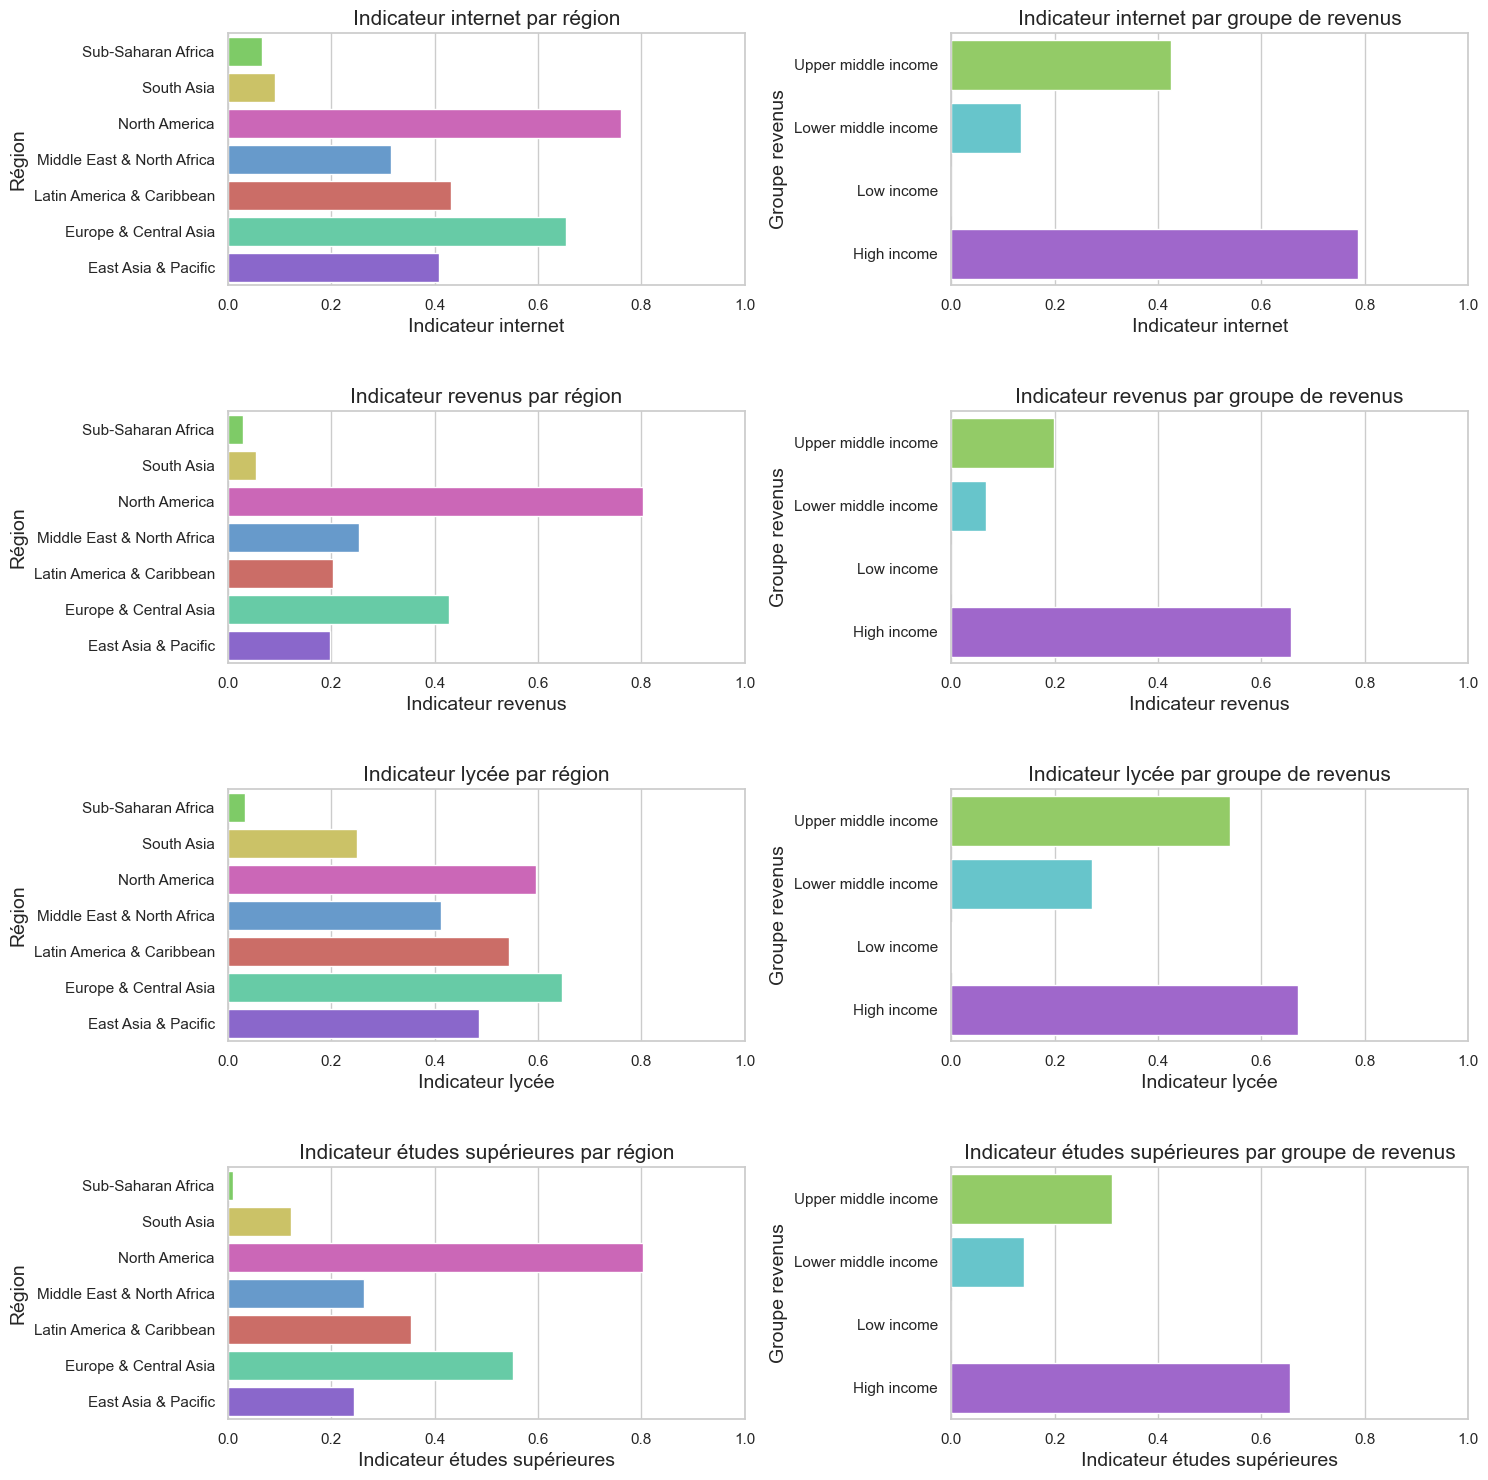

In [109]:
plt.figure(figsize=(16,18))
grid = plt.GridSpec(4, 2, wspace=0.4, hspace=0.5)

#Définition d'une couleur pour chaque valeur de groupe de revenus et du groupe region
colors_revenu = sns.color_palette("hls", len(Groupe_revenus))
palette_rev = {groupe: color for groupe, color in zip(Groupe_revenus, colors_revenu)}

colors_region = sns.color_palette("hls", len(Groupe_region))
palette_reg = {groupe: color for groupe, color in zip(Groupe_region, colors_region)}


#Groupe region

plt.subplot(grid[0,0])
sns.barplot(x=Df_groupe_region["Utilisateurs d'internet"], y=Df_groupe_region.index,palette=palette_reg)
plt.xlabel("Indicateur internet", fontsize=14)
plt.ylabel("Région", fontsize=14)
plt.title("Indicateur internet par région", fontsize=15)
plt.axis([0, 1,-0.5,6.5])

plt.subplot(grid[1,0])
sns.barplot(x=Df_groupe_region["Revenu par habitant, PPP"], y=Df_groupe_region.index,palette=palette_reg)
plt.xlabel("Indicateur revenus", fontsize=14)
plt.ylabel("Région", fontsize=14)
plt.title("Indicateur revenus par région", fontsize=15)
plt.axis([0, 1,-0.5,6.5])

plt.subplot(grid[2,0])
sns.barplot(x=Df_groupe_region["Taux de scolarisation au lycée"], y=Df_groupe_region.index,palette=palette_reg);
plt.xlabel("Indicateur lycée", fontsize=14)
plt.ylabel("Région", fontsize=14)
plt.title("Indicateur lycée par région", fontsize=15);
plt.axis([0, 1,-0.5,6.5])

plt.subplot(grid[3,0])
sns.barplot(x=Df_groupe_region["Taux de scolarisation ENS"], y=Df_groupe_region.index,palette=palette_reg)
plt.xlabel("Indicateur études supérieures", fontsize=14)
plt.ylabel("Région", fontsize=14)
plt.title("Indicateur études supérieures par région", fontsize=15)
plt.axis([0, 1,-0.5,6.5])

#Groupe revenus

plt.subplot(grid[0,1])
sns.barplot(x=Df_groupe_revenus["Utilisateurs d'internet"], y=Df_groupe_revenus.index,palette=palette_rev)
plt.xlabel("Indicateur internet", fontsize=14)
plt.ylabel("Groupe revenus", fontsize=14)
plt.title("Indicateur internet par groupe de revenus", fontsize=15)
plt.axis([0, 1,-0.5,3.5])

plt.subplot(grid[1,1])
sns.barplot(x=Df_groupe_revenus["Revenu par habitant, PPP"], y=Df_groupe_revenus.index,palette=palette_rev)
plt.xlabel("Indicateur revenus", fontsize=14)
plt.ylabel("Groupe revenus", fontsize=14)
plt.title("Indicateur revenus par groupe de revenus", fontsize=15)
plt.axis([0, 1,-0.5,3.5])

plt.subplot(grid[2,1])
sns.barplot(x=Df_groupe_revenus["Taux de scolarisation au lycée"], y=Df_groupe_revenus.index,palette=palette_rev)
plt.xlabel("Indicateur lycée", fontsize=14)
plt.ylabel("Groupe revenus", fontsize=14)
plt.title("Indicateur lycée par groupe de revenus", fontsize=15)
plt.axis([0, 1,-0.5,3.5])

plt.subplot(grid[3,1])
sns.barplot(x=Df_groupe_revenus["Taux de scolarisation ENS"], y=Df_groupe_revenus.index,palette=palette_rev)
plt.xlabel("Indicateur études supérieures", fontsize=14)
plt.ylabel("Groupe revenus", fontsize=14)
plt.title("Indicateur études supérieures par groupe de revenus", fontsize=15)
plt.axis([0, 1,-0.5,3.5]);




## 4.2 Score des pays <a class="anchor" id="section4_2"></a>

Pour le calcul du score nous allons multiplier tout les indicateurs ensembles :

In [111]:
Df_pays["score"]=Df_pays["Utilisateurs d'internet"] * Df_pays["Revenu par habitant, PPP"] * Df_pays["Taux de scolarisation au lycée"] * Df_pays["Taux de scolarisation ENS"] * Df_pays["Population 15-24 ans"]

In [112]:
Df_pays=Df_pays.sort_values("score", ascending=False)
Df_pays

Indicator Code        Utilisateurs d'internet  Revenu par habitant, PPP  \
Country Name                                                              
United States                        0.747896                  0.821809   
Japan                                0.879119                  0.594326   
Germany                              0.876169                  0.693543   
Russian Federation                   0.621724                  0.346071   
Korea, Rep.                          0.894774                  0.491945   
United Kingdom                       0.928127                  0.585047   
France                               0.844959                  0.598807   
Canada                               0.883885                  0.643091   
Australia                            0.844205                  0.647440   
Spain                                0.736923                  0.492499   
Netherlands                          0.967515                  0.734901   
Saudi Arabia                         0.564850                  0.785828   
Italy                                0.562620                  0.549040   
Poland                               0.652298                  0.346941   
Belgium                              0.849920                  0.665708   
Sweden                               0.970355                  0.704931   
Norway                               1.000000                  1.000000   
Denmark                              0.977615                  0.723804   
Finland                              0.925566                  0.628013   
Austria                              0.831083                  0.716054   
Switzerland                          0.898534                  0.921712   
Chile                                0.561795                  0.302920   
Hong Kong SAR, China                 0.787299                  0.822811   
Greece                               0.571781                  0.392200   
Ireland                              0.794051                  0.636185   
New Zealand                          0.869179                  0.503095   
Israel                               0.738008                  0.487517   
Czech Republic                       0.751037                  0.424623   
Portugal                             0.615186                  0.407331   
Slovak Republic                      0.798990                  0.401532   
Croatia                              0.647382                  0.305266   
Uruguay                              0.562375                  0.271421   

Indicator Code        Taux de scolarisation au lycée  \
Country Name                                           
United States                               0.586282   
Japan                                       0.650790   
Germany                                     0.663579   
Russian Federation                          0.616386   
Korea, Rep.                                 0.603626   
United Kingdom                              0.711505   
France                                      0.747292   
Canada                                      0.699424   
Australia                                   1.000000   
Spain                                       0.932466   
Netherlands                                 0.944848   
Saudi Arabia                                0.714669   
Italy                                       0.657411   
Poland                                      0.648988   
Belgium                                     0.997939   
Sweden                                      0.795276   
Norway                                      0.761977   
Denmark                                     0.900699   
Finland                                     0.907328   
Austria                                     0.620778   
Switzerland                                 0.611823   
Chile                                       0.600638   
Hong Kong SAR, China                        0.606872   
Greece                                      0.689

6 pays ont un meilleur score que la France et peuvent donc être de bonnes opportunitées pour un développement à l'international : United States, Japan, Germany, Russian Federation, Korea Rep., United Kingdom

Les USA ont de loin le score le plus élevé, et sont probablement la cible à priviligiée

In [113]:
#Selections des 6 pays + France :
selection_pays=Df_pays.iloc[0:7]

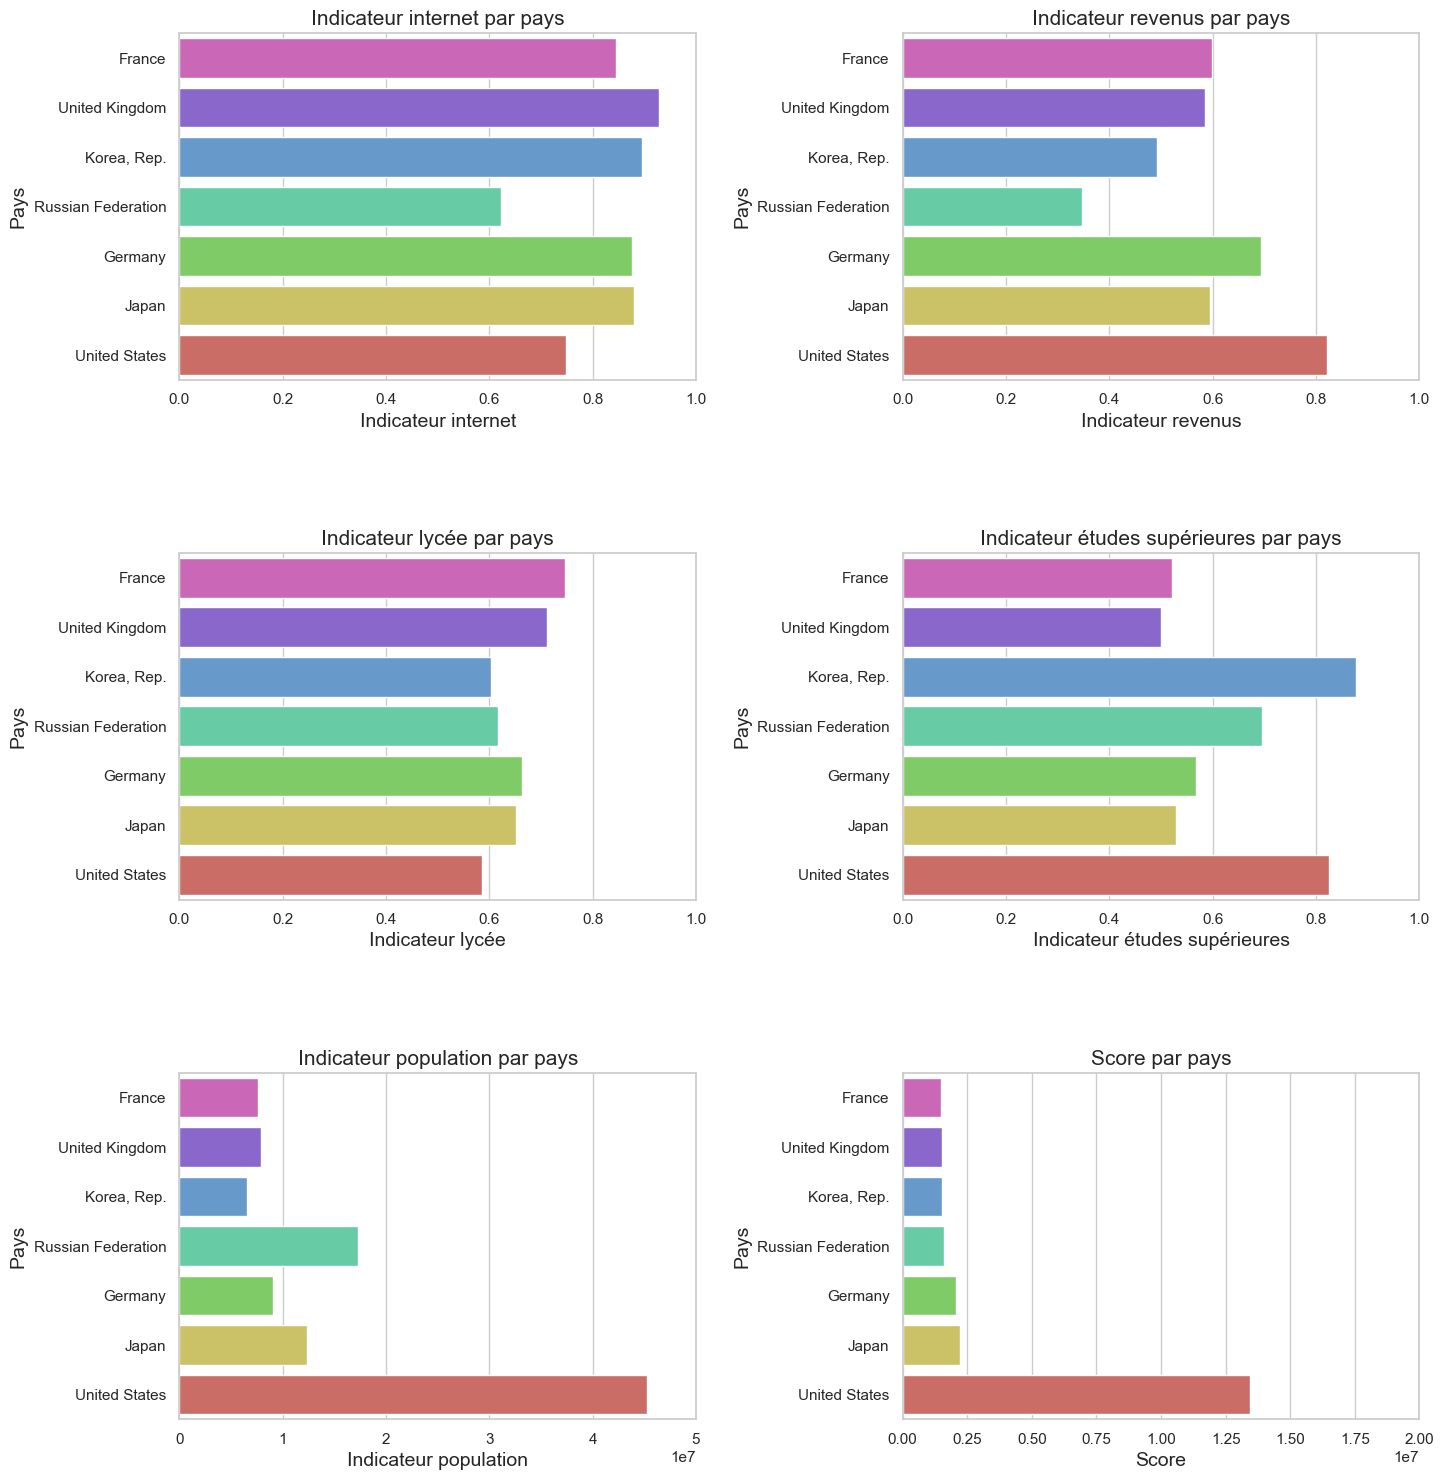

In [141]:
#Regardons plus en détail ces 6 pays ainsi que la France en fonction des différents indicateurs
plt.figure(figsize=(16,18))
grid = plt.GridSpec(3, 2, wspace=0.4, hspace=0.5)

#Définition d'une couleur pour chaque pays
colors_pays = sns.color_palette("hls", len(selection_pays.index))
palette_pays = {groupe: color for groupe, color in zip(selection_pays.index, colors_pays)}

#Groupe region

plt.subplot(grid[0,0])
sns.barplot(x=selection_pays["Utilisateurs d'internet"], y=selection_pays.index,palette=palette_pays)
plt.xlabel("Indicateur internet", fontsize=14)
plt.ylabel("Pays", fontsize=14)
plt.title("Indicateur internet par pays", fontsize=15)
plt.axis([0, 1,-0.5,6.5])

plt.subplot(grid[0,1])
sns.barplot(x=selection_pays["Revenu par habitant, PPP"], y=selection_pays.index,palette=palette_pays)
plt.xlabel("Indicateur revenus", fontsize=14)
plt.ylabel("Pays", fontsize=14)
plt.title("Indicateur revenus par pays", fontsize=15)
plt.axis([0, 1,-0.5,6.5])

plt.subplot(grid[1,0])
sns.barplot(x=selection_pays["Taux de scolarisation au lycée"], y=selection_pays.index,palette=palette_pays);
plt.xlabel("Indicateur lycée", fontsize=14)
plt.ylabel("Pays", fontsize=14)
plt.title("Indicateur lycée par pays", fontsize=15);
plt.axis([0, 1,-0.5,6.5])

plt.subplot(grid[1,1])
sns.barplot(x=selection_pays["Taux de scolarisation ENS"], y=selection_pays.index,palette=palette_pays)
plt.xlabel("Indicateur études supérieures", fontsize=14)
plt.ylabel("Pays", fontsize=14)
plt.title("Indicateur études supérieures par pays", fontsize=15)
plt.axis([0, 1,-0.5,6.5])

#Groupe revenus

plt.subplot(grid[2,1])
sns.barplot(x=selection_pays["score"], y=selection_pays.index,palette=palette_pays)
plt.xlabel("Score", fontsize=14)
plt.ylabel("Pays", fontsize=14)
plt.title("Score par pays", fontsize=15)
plt.axis([0, 20000000,-0.5,6.5])

plt.subplot(grid[2,0])
sns.barplot(x=selection_pays["Population 15-24 ans"], y=selection_pays.index,palette=palette_pays)
plt.xlabel("Indicateur population", fontsize=14)
plt.ylabel("Pays", fontsize=14)
plt.title("Indicateur population par pays", fontsize=15)
plt.axis([0, 50000000,-0.5,6.5]);


Pour déterminer le meilleur pays en vue d'une expansion il est nécessaire de chercher à anticiper l'évolution des indicateurs et de ce score pour les années à venir, nous allons donc chercher à estimer les valeurs des indicateurs pour les années 2020, 2025 et 2030:

In [116]:
List_selection=Df_pays.iloc[0:7].index

## 4.3 Prévision du score futur <a class="anchor" id="section4_3"></a>

In [117]:
#Reprenons notre data frame Df_futur
Df_futur=Df_futur.drop(columns="Valeur")
Df_futur=Df_futur.loc[Df_futur["Country Name"].isin(List_selection)].reset_index().drop(columns="index")

In [118]:
Df_futur["2020"]=np.NaN
Df_futur["2025"]=np.NaN
Df_futur["2030"]=np.NaN

L'utilisation d'un modèle de regression linéaire pour réaliser les prévisions est une solution simple à mettre en place mais celle-ci à quelques limites et ne donnera qu'une tendance. En effet les indicateurs n'évolus pas de manière linéaire, de plus certaine correcetion doivent être effectuée. Notamment l'indicateur IT.NET.USER.P2 qui ne peut pas dépasser 100.

In [120]:
X_prev=np.array([[2020,2025,2030]]).reshape(-1, 1)
regr=linear_model.LinearRegression()
for line in Df_futur.index :
    X=np.array([[int(year) for year in np.delete(Df_futur.columns,[0,1,8,9,10])]]).reshape(-1, 1)
    y=[]
    for year in np.delete(Df_futur.columns,[0,1,8,9,10]):
        y.append(Df_futur[year][line]) 
    y=np.array([y]).reshape(-1, 1)
#Suppression des NaN pour pouvoir utiliser la regression linéaire
    if np.isnan(y).any():
        indices_retirer=np.where(np.isnan(y))
        y=np.delete(y,indices_retirer[0]).reshape(-1, 1)
        X=np.delete(X,indices_retirer[0]).reshape(-1, 1) 
    regr.fit(X,y)
    y_pred=regr.predict(X_prev)
    i=0
    for year_pred in ["2020","2025","2030"] :
        Df_futur[year_pred][line]=y_pred[i][0]
        i=i+1

In [121]:
Df_futur

Country Name     Indicator Code          2010          2011  \
0               France  NY.GNP.PCAP.PP.CD  3.676000e+04  3.832000e+04   
1               France        SE.SEC.ENRR  1.113269e+02  1.112224e+02   
2               France        SE.TER.ENRR  5.712708e+01  5.802498e+01   
3               France     IT.NET.USER.P2  7.728000e+01  7.782000e+01   
4               France  SP.POP.1524.TO.UN  7.635485e+06  7.604177e+06   
5              Germany  NY.GNP.PCAP.PP.CD  4.004000e+04  4.377000e+04   
6              Germany        SE.SEC.ENRR  1.039837e+02  1.036433e+02   
7              Germany        SE.TER.ENRR           NaN           NaN   
8              Germany     IT.NET.USER.P2  8.200000e+01  8.127000e+01   
9              Germany  SP.POP.1524.TO.UN  9.388651e+06  9.255162e+06   
10               Japan  NY.GNP.PCAP.PP.CD  3.590000e+04  3.679000e+04   
11               Japan        SE.SEC.ENRR  1.016095e+02  1.017654e+02   
12               Japan        SE.TER.ENRR  5.807524e+01  5.992399e+01   
13               Japan     IT.NET.USER.P2  7.821000e+01  7.905411e+01   
14               Japan  SP.POP.1524.TO.UN  1.263713e+07  1.247292e+07   
15         Korea, Rep.  NY.GNP.PCAP.PP.CD  3.041000e+04  3.141000e+04   
16         Korea, Rep.        SE.SEC.ENRR  9.607979e+01  9.573593e+01   
17         Korea, Rep.        SE.TER.ENRR  9.966034e+01  9.951940e+01   
18         Korea, Rep.     IT.NET.USER.P2  8.370000e+01  8.375912e+01   
19         Korea, Rep.  SP.POP.1524.TO.UN  6.619654e+06  6.600849e+06   
20  Russian Federation  NY.GNP.PCAP.PP.CD  1.986000e+04  2.336000e+04   
21  Russian Federation        SE.SEC.ENRR           NaN  9.204780e+01   
22  Russian Federation        SE.TER.ENRR           NaN  7.649778e+01   
23  Russian Federation     IT.NET.USER.P2  4.300000e+01  4.900000e+01   
24  Russian Federation  SP.POP.1524.TO.UN  2.019633e+07  1.899944e+07   
25      United Kingdom  NY.GNP.PCAP.PP.CD  3.620000e+04  3.690000e+04   
26      United Kingdom        SE.SEC.ENRR  1.019089e+02  9.284833e+01   
27      United Kingdom        SE.TER.ENRR  5.906696e+01  5.898591e+01   
28      United Kingdom     IT.NET.USER.P2  8.500000e+01  8.538000e+01   
29      United Kingdom  SP.POP.1524.TO.UN  8.035314e+06  8.005514e+06   
30       United States  NY.GNP.PCAP.PP.CD  4.888000e+04  5.071000e+04   
31       United States        SE.SEC.ENRR  9.431131e+01  9.467605e+01   
32       United States        SE.TER.ENRR  9.422801e+01  9.632240e+01   
33       United States     IT.NET.USER.P2  7.169000e+01  6.972946e+01   
34       United States  SP.POP.1524.TO.UN  4.513709e+07  4.529614e+07   

            2012          2013          2014          2015          2020  \
0   3.818000e+04  4.004000e+04  4.080000e+04  4.180000e+04  4.670952e+04   
1   1.116653e+02  1.109407e+02  1.106440e+02           NaN  1.098418e+02   
2   5.998763e+01  6.214687e+01  6.439047e+01           NaN  7.525435e+01   
3   8.144000e+01  8.191980e+01  8.375000e+01  8.469450e+01  9.300978e+01   
4   7.576981e+06  7.558568e+06  7.554426e+06  7.567872e+06  7.474547e+06   
5   4.459000e+04  4.625000e+04  4.813000e+04  4.906000e+04  5.812952e+04   
6   1.028839e+02  1.024777e+02  1.024299e+02  1.026654e+02  1.007344e+02   
7            NaN  6.105642e+01  6.547380e+01  6.826559e+01  8.655944e+01   
8   8.235000e+01  8.417000e+01  8.619000e+01  8.758980e+01  9.347023e+01   
9   9.111578e+06  8.964066e+06  8.819364e+06  8.682394e+06  7.968400e+06   
10  3.819000e+04  4.028000e+04  4.081000e+04  4.223000e+04  4.884762e+04   
11  1.018073e+02  1.019200e+02  1.017456e+02           NaN  1.021110e+02   
12  6.145817e+01  6.241163e+01  6.336259e+01           NaN  7.149620e+01   
13  7.949640e+01  8.821943e+01  8.910683e+01  9.105803e+01  1.062882e+02   
14  1.235502e+07  1.227280e+07  1.221108e+07  1.215743e+07  1.165115e+07   
15  3.243000e+04  3.285000e+04  3.374000e+04  3.452000e+04  3.855143e+04   
16  9.619918e+01  9.773029e+01  9.845323e+01  9.888209e+01  1.022575e+02   
17  9.720694e

In [122]:
#Valeur maximal de l'indicateur "IT.NET.USER.P2"=100
for year in ["2020","2025","2030"] :
    Df_futur.loc[(Df_futur["Indicator Code"]=="IT.NET.USER.P2") & (Df_futur[year]>100),[year]]=100

In [123]:
#Suppression des colonnes inutiles
Df_futur=Df_futur.drop(columns=["2010","2011","2012","2013","2014","2015"])

In [124]:
#Scaling des prévisions
for index in Df_futur.index :
    if Df_futur["Indicator Code"][index]=="NY.GNP.PCAP.PP.CD" :
        for year in ["2020","2025","2030"] :
            Df_futur[year][index]=scaling(minimum[1],maximum[1],Df_futur[year][index])
    elif Df_futur["Indicator Code"][index]=="SE.SEC.ENRR" :
        for year in ["2020","2025","2030"] :
            Df_futur[year][index]=scaling(minimum[2],maximum[2],Df_futur[year][index])
    elif Df_futur["Indicator Code"][index]=="SE.TER.ENRR" :
        for year in ["2020","2025","2030"] :
            Df_futur[year][index]=scaling(minimum[3],maximum[3],Df_futur[year][index])
    elif Df_futur["Indicator Code"][index]=="IT.NET.USER.P2" :
        for year in ["2020","2025","2030"] :
            Df_futur[year][index]=scaling(minimum[0],maximum[0],Df_futur[year][index])    

In [125]:
#L'utilisation d'une regression linéaire entraine l'apparition d'une valeur négative pour la Russie sur l'indicateur de population 15-24
for year in ["2020","2025","2030"] :
    Df_futur.loc[(Df_futur["Indicator Code"]=="SP.POP.1524.TO.UN") & (Df_futur[year]<0),[year]]=0

In [128]:
Df_futur=Df_futur.groupby(Df_futur["Country Name"]).prod()
Df_futur=selection_pays.drop(columns=["Utilisateurs d'internet","Revenu par habitant, PPP","Taux de scolarisation au lycée","Taux de scolarisation ENS","Population 15-24 ans"]).merge(Df_futur,on="Country Name")
Df_futur=Df_futur.rename(columns={"score":"Score base","2020": "Score 2020", "2025": "Score 2025","2030": "Score 2030"})

In [129]:
Df_futur=Df_futur.T
Df_futur

Country Name  United States         Japan       Germany  Russian Federation  \
Score base     1.343960e+07  2.220336e+06  2.065762e+06        1.592187e+06   
Score 2020     1.604620e+07  3.812957e+06  3.505276e+06        2.449240e+06   
Score 2025     1.685688e+07  4.604669e+06  4.718262e+06        1.247568e+06   
Score 2030     1.669894e+07  5.422719e+06  5.571628e+06        0.000000e+00   

Country Name   Korea, Rep.  United Kingdom        France  
Score base    1.531091e+06    1.526843e+06  1.495785e+06  
Score 2020    1.877786e+06    3.439582e+06  2.566612e+06  
Score 2025    2.065094e+06    4.415253e+06  3.422724e+06  
Score 2030    2.091377e+06    5.247012e+06  4.122539e+06

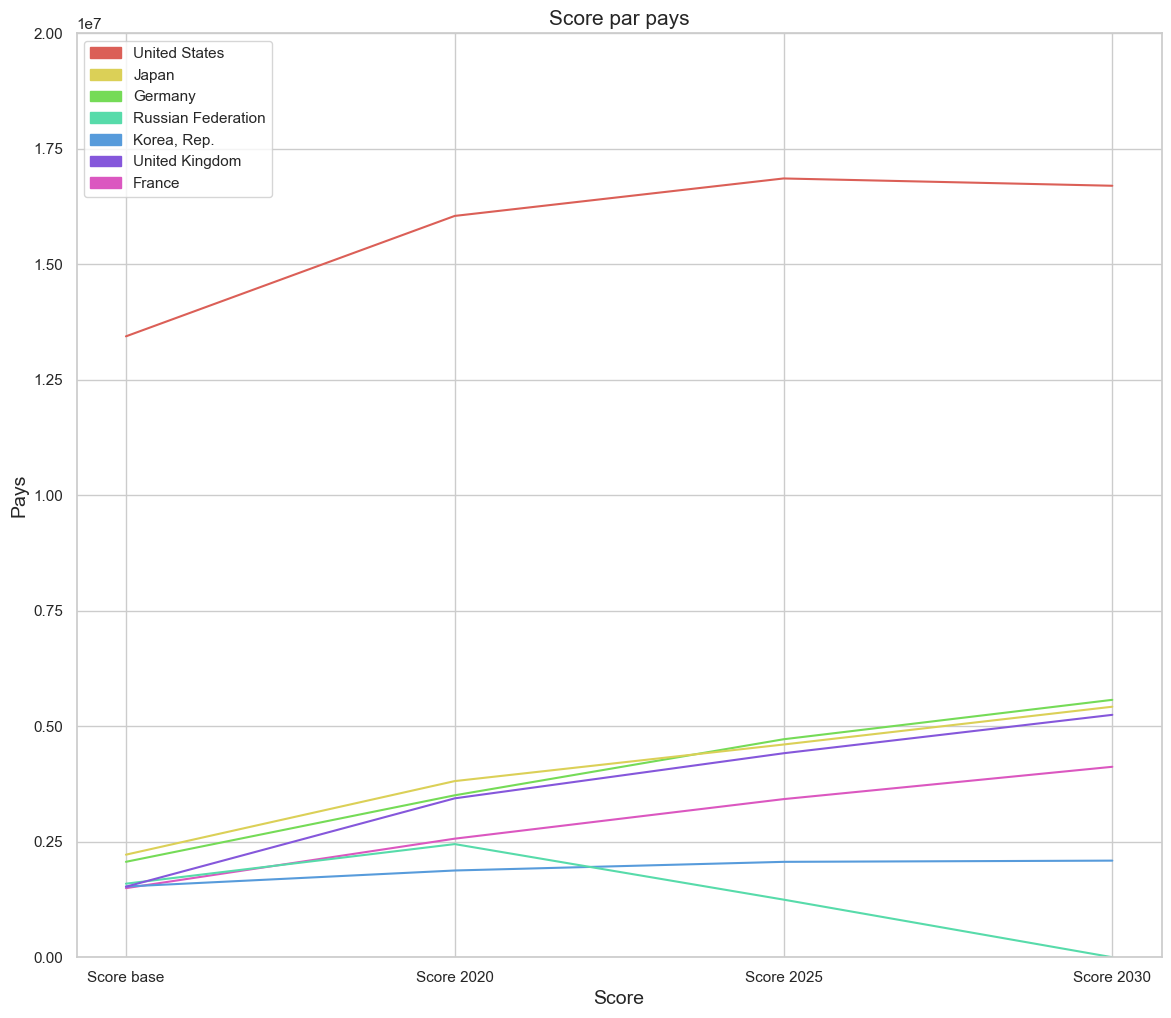

In [162]:
handle=[]
for i in Df_futur.columns:
    label_patch = mpatches.Patch(color=palette_pays[i], label=i)
    handle.append(label_patch)
plt.figure(figsize=(14,12))
sns.lineplot(Df_futur, x=Df_futur.index, y=Df_futur["France"], color=palette_pays["France"], markers=True, linestyle="solid")
sns.lineplot(Df_futur, x=Df_futur.index, y=Df_futur["Germany"], color=palette_pays["Germany"], markers=True, linestyle="solid")
sns.lineplot(Df_futur, x=Df_futur.index, y=Df_futur["Japan"], color=palette_pays["Japan"], markers=True, linestyle="solid")
sns.lineplot(Df_futur, x=Df_futur.index, y=Df_futur["Korea, Rep."], color=palette_pays["Korea, Rep."], markers=True, linestyle="solid")
sns.lineplot(Df_futur, x=Df_futur.index, y=Df_futur["Russian Federation"], color=palette_pays["Russian Federation"], markers=True, linestyle="solid")
sns.lineplot(Df_futur, x=Df_futur.index, y=Df_futur["United Kingdom"], color=palette_pays["United Kingdom"], markers=True, linestyle="solid")
sns.lineplot(Df_futur, x=Df_futur.index, y=Df_futur["United States"], color=palette_pays["United States"], markers=True, linestyle="solid")

plt.xlabel("Score", fontsize=14)
plt.ylabel("Pays", fontsize=14)
plt.legend(handles=handle)
plt.title("Score par pays", fontsize=15);
plt.ylim(0,20000000);

On observe qu'a moyen terme (+10 ans), les USA restent largement le meilleur choix pour une expansion, on retrouve ensuite le Japon,l'Allemagne et le Royaume-Uni qui sont à moyen terme 3 pays d'intérêt majeur.

Une bonne stratégie pourrait être de choisir les USA en premier et dans un second temps le Royaume-Uni puisque ceux-ci partagent la même langue.